In [428]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set()
from IPython.display import display

In [429]:
spdf = pd.read_csv("Sparkling.csv")

# Data definition

In [430]:
spdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [431]:
spdf.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

# Data description


In [432]:
spdf.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [433]:
spdf.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

## Organize dataset

In [434]:
Date = pd.date_range(start="1980-01-01", periods=187, freq="M")
Date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [435]:
spdf["Date"] = Date

In [436]:
spdf.drop("YearMonth", axis=1, inplace=True)

In [437]:
spdf.set_index("Date", inplace=True)

In [438]:
spdf.head()

Sparkling
Date                 
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [439]:
spdf.index.freq = "M"

# Time series plot

In [440]:
from pylab import rcParams # or we can write plt.rcParams['figure.figsize'] = 15,8
rcParams['figure.figsize'] = 15,8

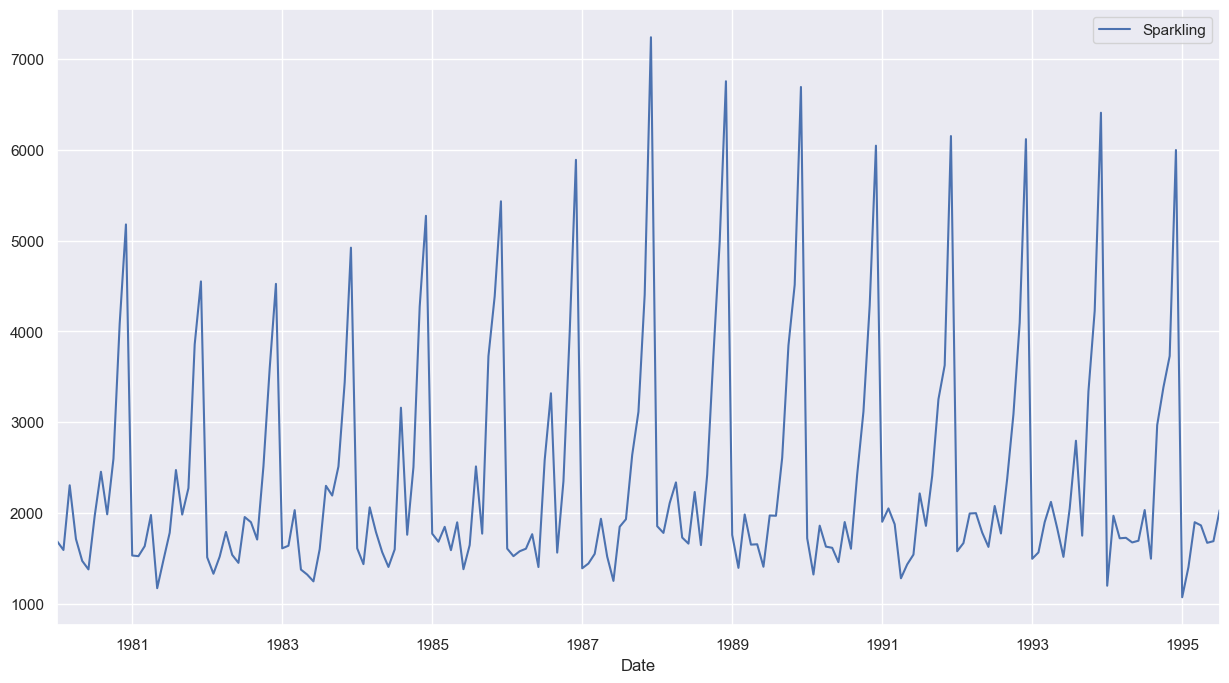

In [441]:
spdf.plot()
plt.show()

# Box plot

## Yearly box plot

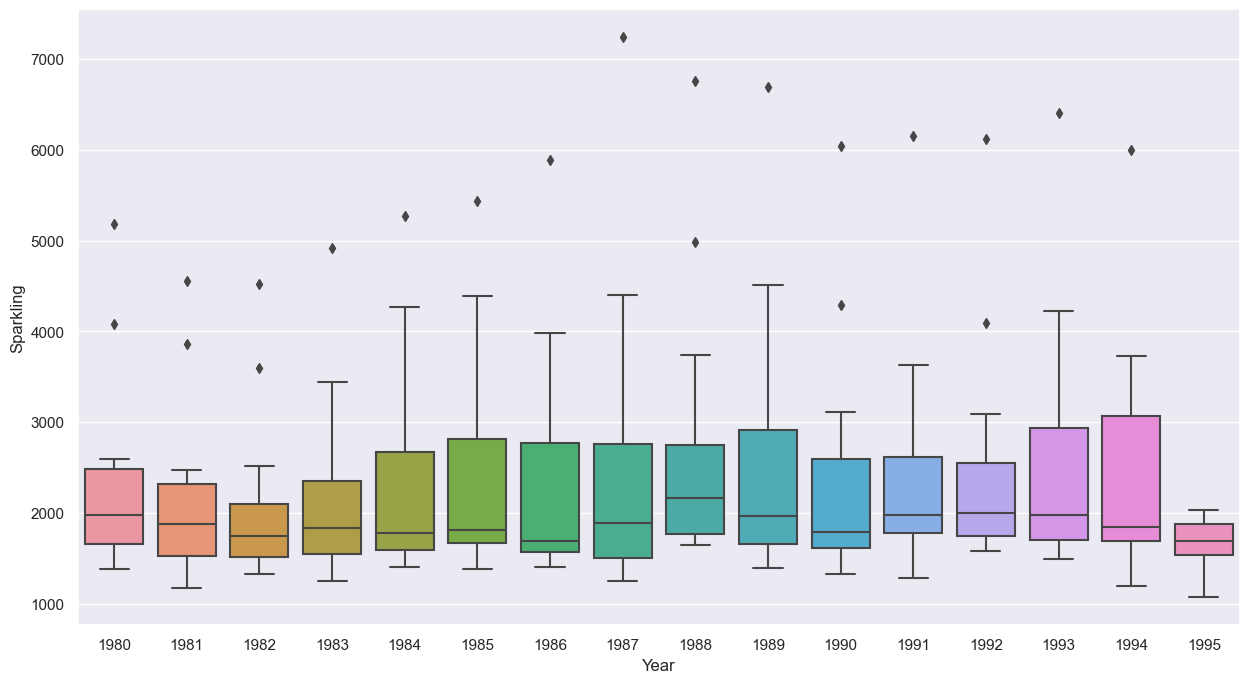

In [442]:
sns.boxplot(x = spdf.index.year, y = spdf["Sparkling"])
plt.xlabel('Year')
plt.show()

## Monthly box plot

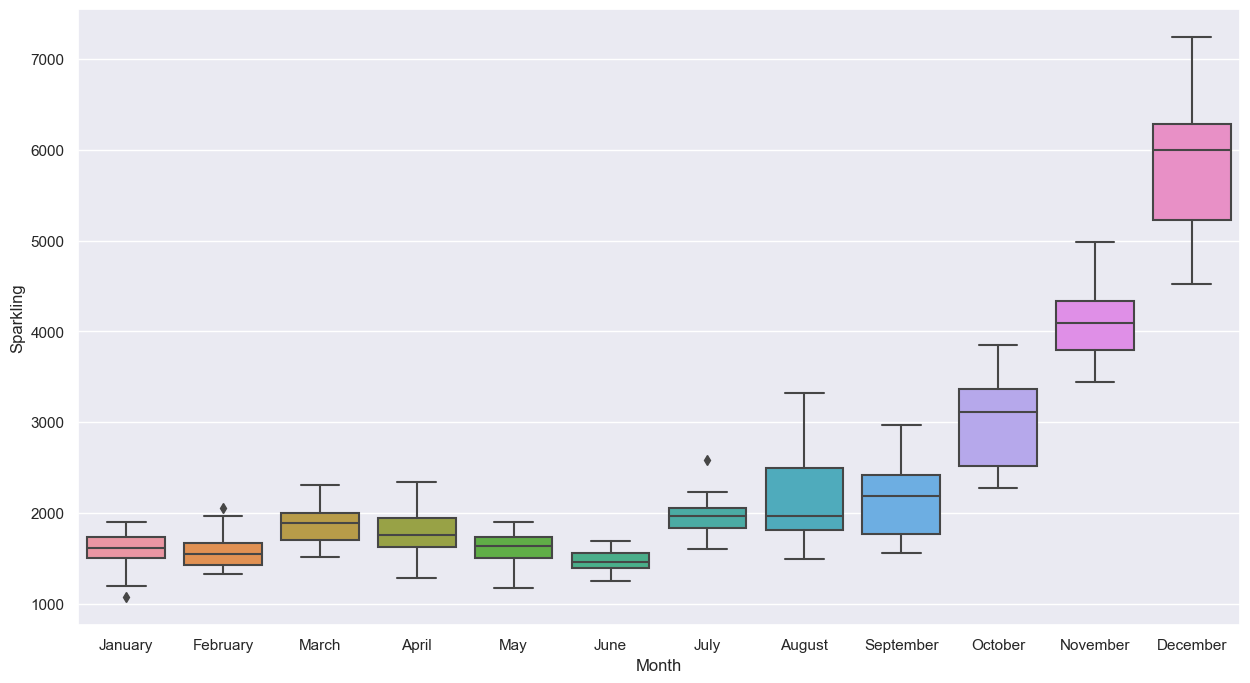

In [443]:
sns.boxplot(x = spdf.index.month_name(), y = spdf["Sparkling"])
plt.xlabel('Month')
plt.show()

## Monthly sales for Sparkling Wine across years for each month

In [444]:
from statsmodels.graphics.tsaplots import month_plot

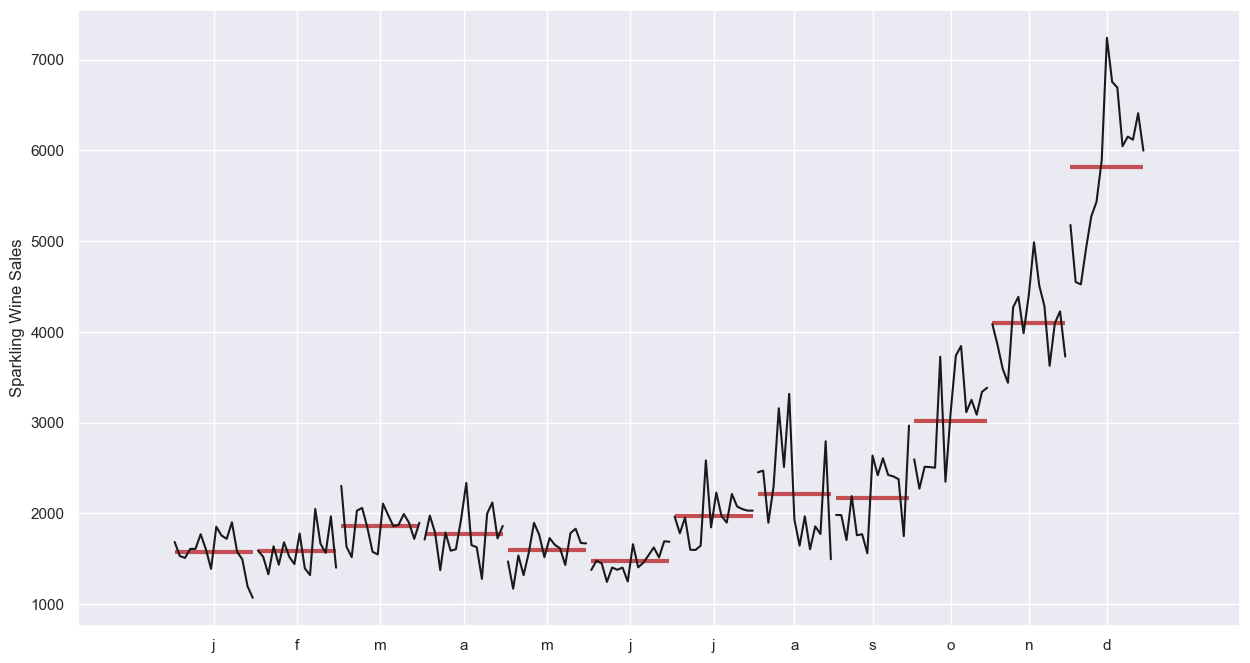

In [445]:
month_plot(spdf, ylabel="Sparkling Wine Sales")

# Decompose the Time Series

In [446]:
from statsmodels.tsa.seasonal import seasonal_decompose

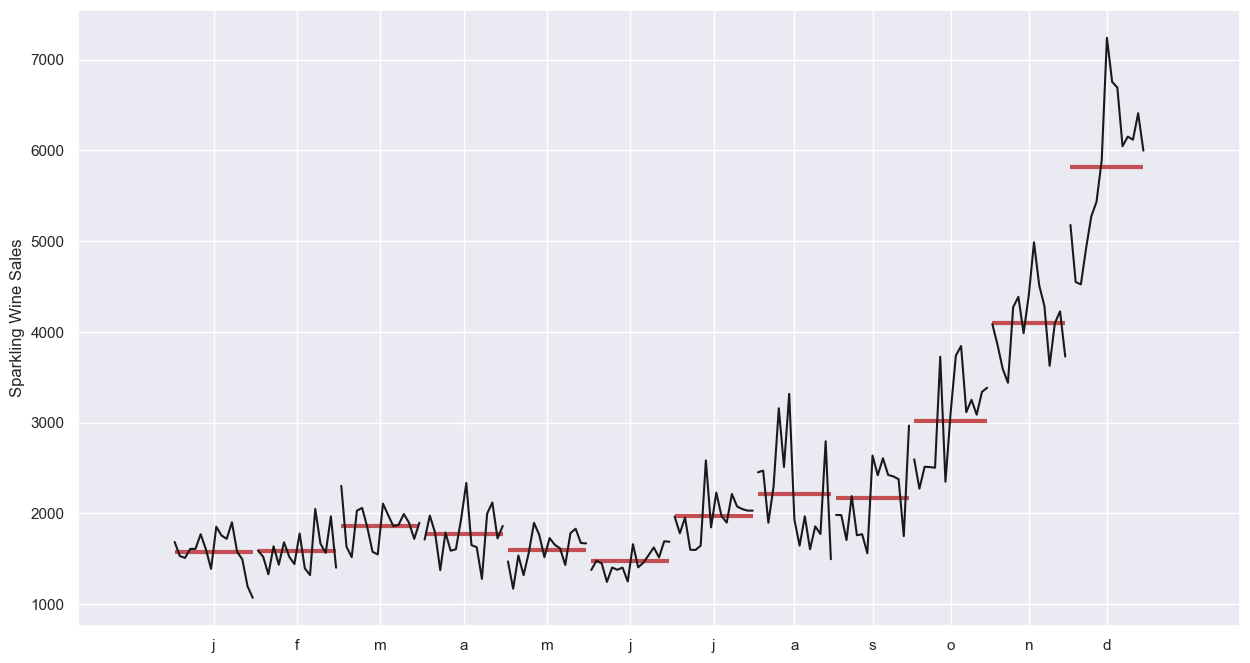

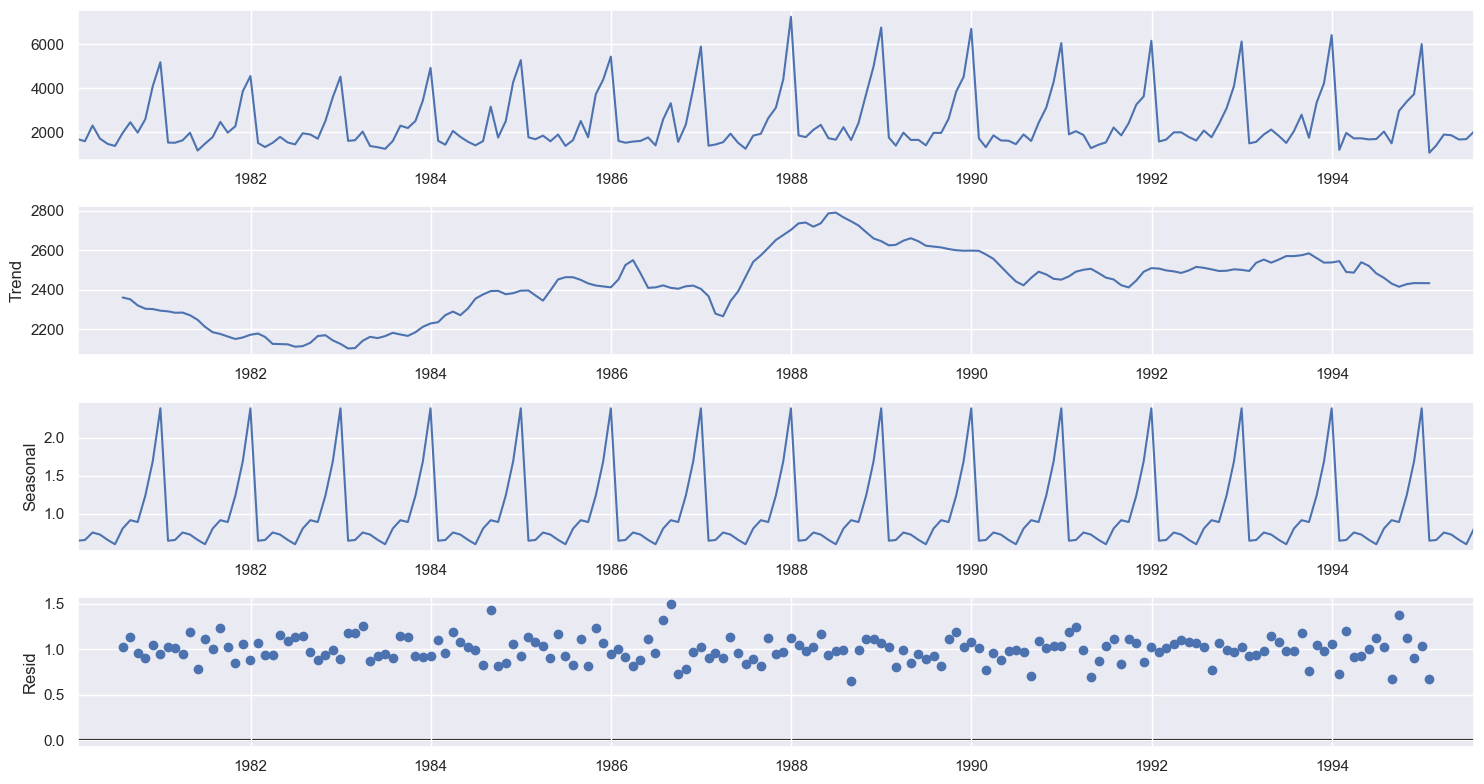

In [447]:
decomposition = seasonal_decompose(spdf, model="multiplicative")
decomposition.plot()
plt.show()

## Trend, Seasonality and Residual

In [448]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print("Trend", "\n", trend.head(12), "\n")
print("Seasonality", "\n", seasonality.head(12), "\n")
print("Residual", "\n", residual.head(12), "\n")

Trend 
 Date
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Freq: M, Name: trend, dtype: float64 

Seasonality 
 Date
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Freq: M, Name: seasonal, dtype: float64 

Residual 
 Date
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Freq: M

# Train test split & plot

In [449]:
train = spdf[spdf.index.year < 1991]
test = spdf[spdf.index.year >= 1991]

In [450]:
train.shape, test.shape

((132, 1), (55, 1))

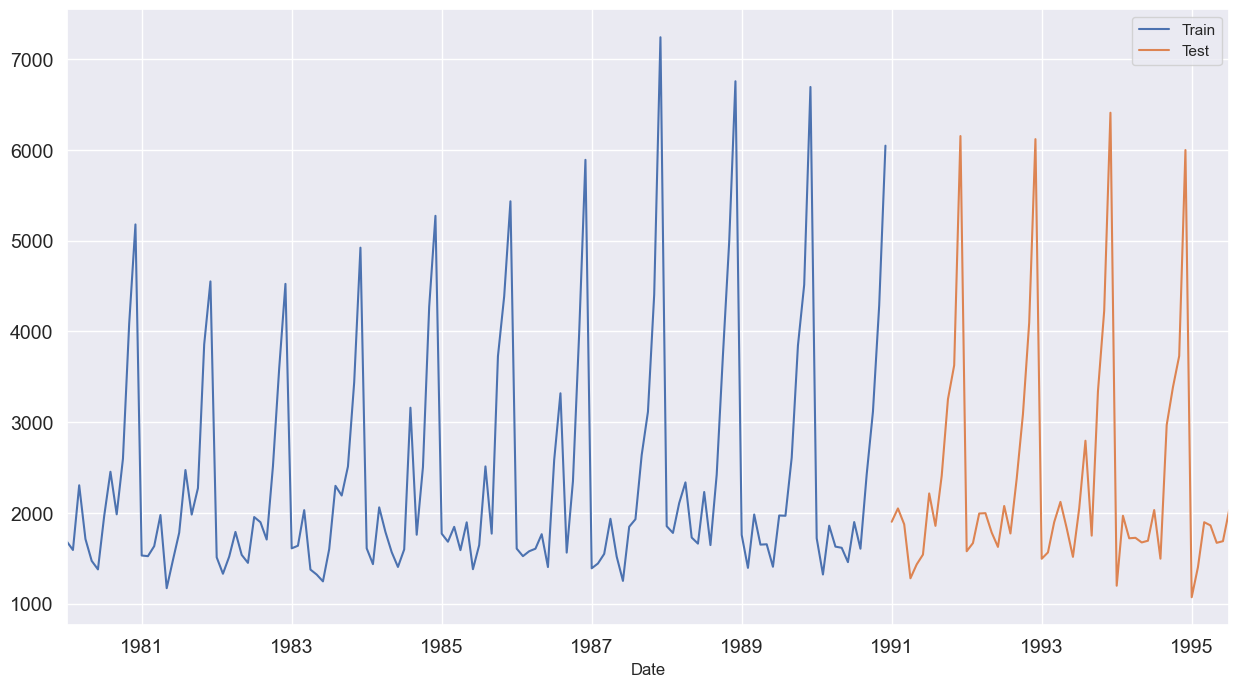

In [451]:
train["Sparkling"].plot(legend = True, label = "Train", fontsize = 14)
test["Sparkling"].plot(legend = True, label = "Test", fontsize = 14)
plt.show()

# Linear regression model – RMSE

We are going to regress the "Sparkling" variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [452]:
train_time  = [i + 1 for i in range(len(train))]
test_time  = [i + 133 for i in range(len(test))]
print("Training time instance", "\n", train_time)
print("Test time instance", "\n", test_time)
print(len(train), len(test))

Training time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]
132 55


In [453]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [454]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [455]:
display(LinearRegression_train.head())
display(LinearRegression_train.tail())

Sparkling  time
Date                       
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5

Sparkling  time
Date                       
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132

In [456]:
from sklearn.linear_model import LinearRegression

In [457]:
lr = LinearRegression()

In [458]:
lr.fit(LinearRegression_train[["time"]], LinearRegression_train["Sparkling"])

LinearRegression()

In [459]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

In [460]:
LinearRegression_test.head(12)

Sparkling  time    RegOnTime
Date                                    
1991-01-31       1902   133  2791.652093
1991-02-28       2049   134  2797.484752
1991-03-31       1874   135  2803.317410
1991-04-30       1279   136  2809.150069
1991-05-31       1432   137  2814.982727
1991-06-30       1540   138  2820.815386
1991-07-31       2214   139  2826.648044
1991-08-31       1857   140  2832.480703
1991-09-30       2408   141  2838.313361
1991-10-31       3252   142  2844.146020
1991-11-30       3627   143  2849.978678
1991-12-31       6153   144  2855.811337

Plot

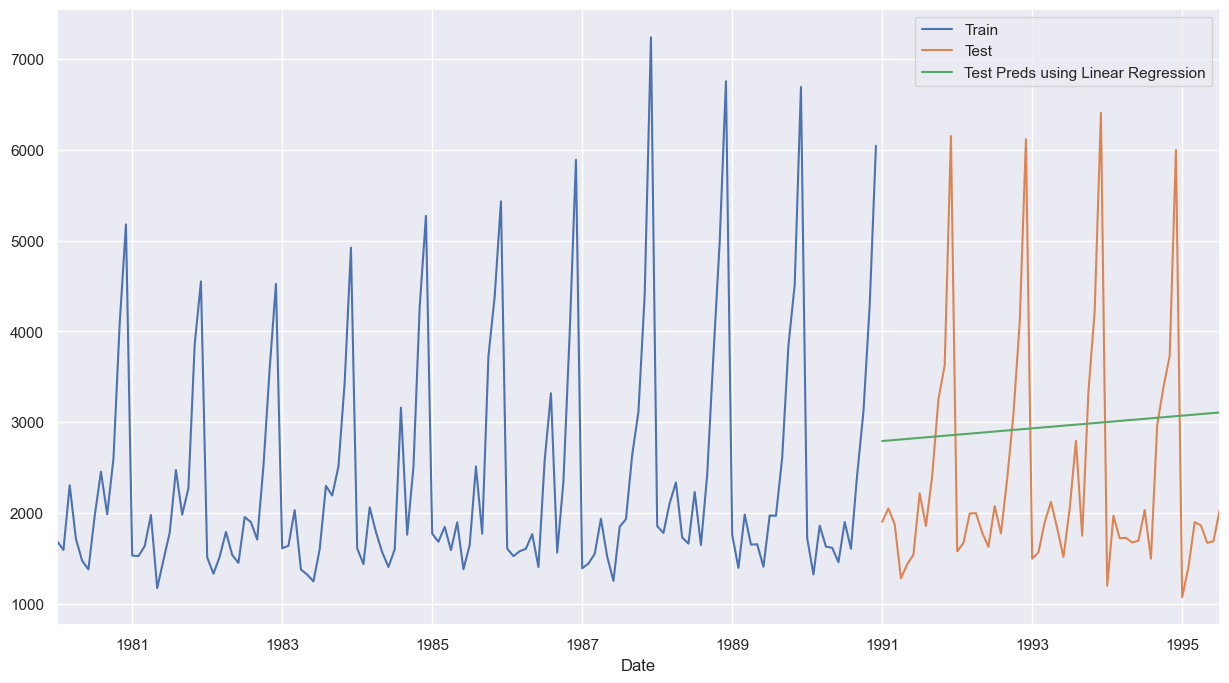

In [461]:
train["Sparkling"].plot(legend = True, label = 'Train')
test["Sparkling"].plot(legend = True, label = 'Test')
LinearRegression_test['RegOnTime'].plot(legend = True, label = 'Test Preds using Linear Regression')
plt.show()

Accuracy Metrics

In [462]:
from statsmodels.tools.eval_measures import rmse

## Model Evaluation and RMSE

In [463]:
rmse_model1_test = rmse(test["Sparkling"], test_predictions_model1)
rmse_model1_test

1389.135174897992

In [464]:
resultsDf = pd.DataFrame({"Test RMSE": [rmse_model1_test]}, index = ["RegressionOnTime"])
resultsDf

Test RMSE
RegressionOnTime  1389.135175

# Naïve model – RMSE

In [465]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [466]:
NaiveModel_test["naive"] = train["Sparkling"][len(train["Sparkling"])-1]

In [467]:
NaiveModel_test["naive"].head()

Date
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Freq: M, Name: naive, dtype: int64

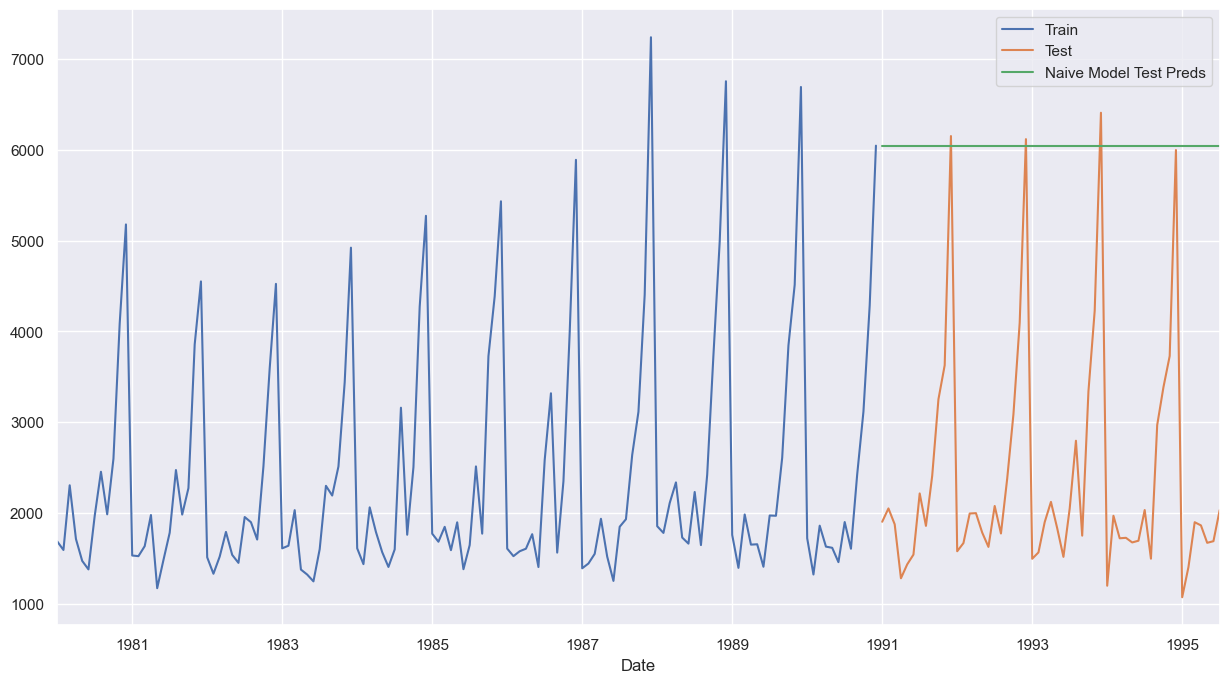

In [468]:
train["Sparkling"].plot(legend = True, label = "Train")
test["Sparkling"].plot(legend = True, label = "Test")
NaiveModel_test["naive"].plot(legend = True, label = "Naive Model Test Preds")
plt.show()

Model Evaluation

In [469]:
rmse_model2_test = rmse(test["Sparkling"], NaiveModel_test["naive"])
print("RMSE for Naive Bayes",rmse_model2_test)


resultsDf_2 = pd.DataFrame({"Test RMSE": [rmse_model2_test]}, index=["NaiveModel"])
resultsDf = pd.concat([resultsDf, resultsDf_2])
display(resultsDf)

RMSE for Naive Bayes 3864.2793518443914


Test RMSE
RegressionOnTime  1389.135175
NaiveModel        3864.279352

# Simple average model – RMSE

In [470]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [471]:
SimpleAverage_test["mean_Sparkling"] = train["Sparkling"].mean()
SimpleAverage_test.head()

Sparkling  mean_Sparkling
Date                                 
1991-01-31       1902     2403.780303
1991-02-28       2049     2403.780303
1991-03-31       1874     2403.780303
1991-04-30       1279     2403.780303
1991-05-31       1432     2403.780303

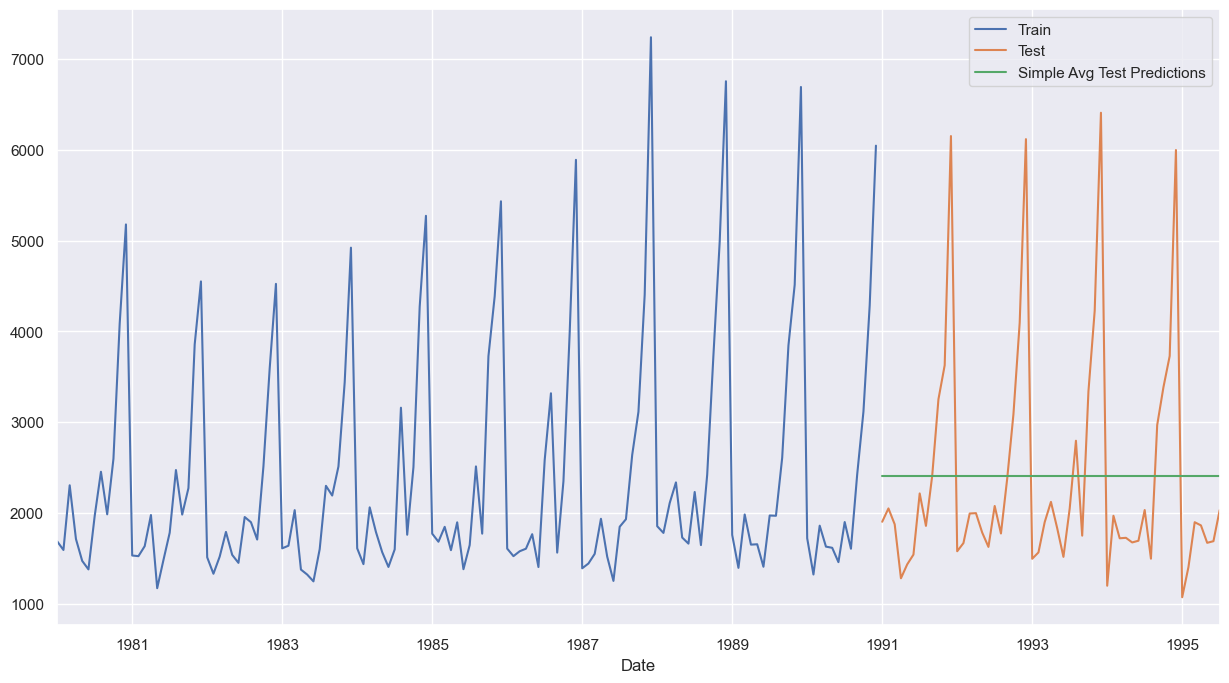

In [472]:
train["Sparkling"].plot(legend = True, label = "Train")
test["Sparkling"].plot(legend = True, label = "Test")
SimpleAverage_test["mean_Sparkling"].plot(legend = True, label = "Simple Avg Test Predictions")
plt.show()

Model Evaluation

In [473]:
rmse_model3_test = rmse(test["Sparkling"], SimpleAverage_test["mean_Sparkling"])
print("RMSE for Simple Average Model is", rmse_model3_test)

RMSE for Simple Average Model is 1275.0818036965309


In [474]:
reultsDf_3 = pd.DataFrame({"Test RMSE": [rmse_model3_test]}, index = ["SimpleAverageModel"])
resultsDf = pd.concat([resultsDf, reultsDf_3])
resultsDf                     


Test RMSE
RegressionOnTime    1389.135175
NaiveModel          3864.279352
SimpleAverageModel  1275.081804

# Moving average model – RMSE

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

For Moving Average, we are going to average over the entire data.

In [475]:
MovingAverage = spdf.copy()
MovingAverage.head()

Sparkling
Date                 
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Trailing moving averages

In [476]:
MovingAverage["Trailing_2"] = MovingAverage["Sparkling"].rolling(2).mean()
MovingAverage["Trailing_4"] = MovingAverage["Sparkling"].rolling(4).mean()
MovingAverage["Trailing_6"] = MovingAverage["Sparkling"].rolling(6).mean()
MovingAverage["Trailing_9"] = MovingAverage["Sparkling"].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Date                                                                 
1980-01-31       1686         NaN         NaN         NaN         NaN
1980-02-29       1591      1638.5         NaN         NaN         NaN
1980-03-31       2304      1947.5         NaN         NaN         NaN
1980-04-30       1712      2008.0     1823.25         NaN         NaN
1980-05-31       1471      1591.5     1769.50         NaN         NaN

Plot the data

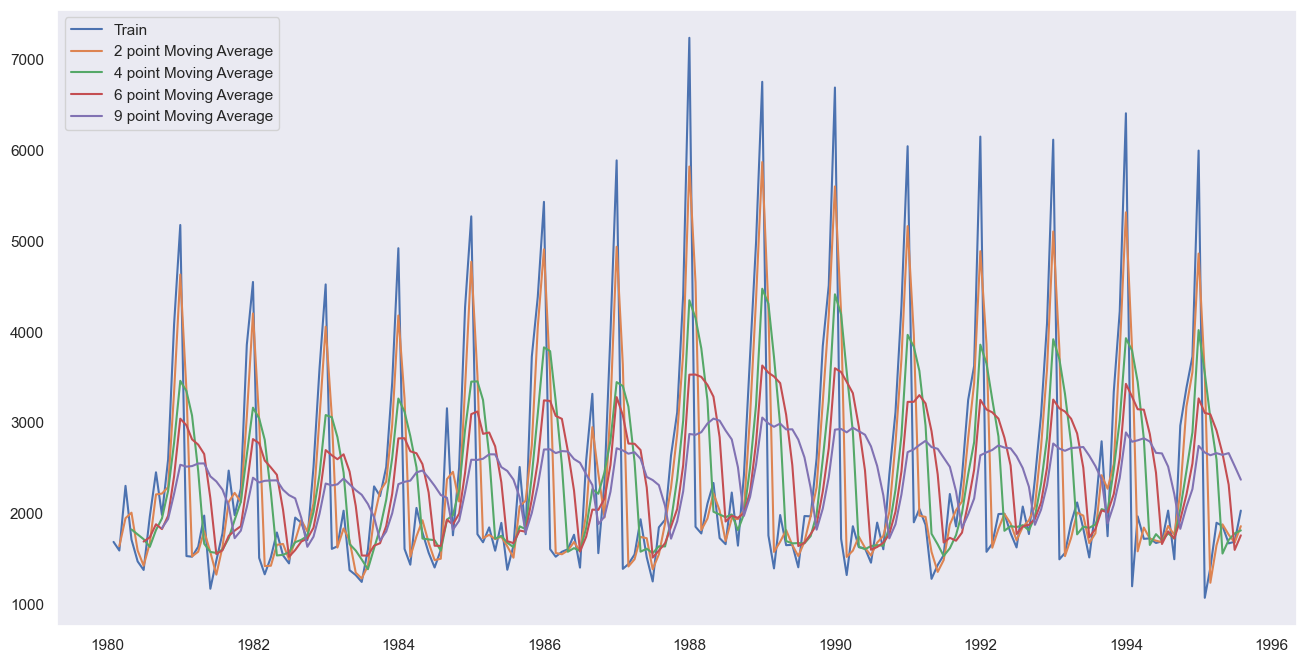

In [477]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage["Sparkling"], label="Train")
plt.plot(MovingAverage["Trailing_2"], label="2 point Moving Average")
plt.plot(MovingAverage["Trailing_4"], label="4 point Moving Average")
plt.plot(MovingAverage["Trailing_6"], label="6 point Moving Average")
plt.plot(MovingAverage["Trailing_9"], label="9 point Moving Average")

plt.legend(loc="best")
plt.grid()
plt.show()

Split the data into train and test and plot

In [478]:
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

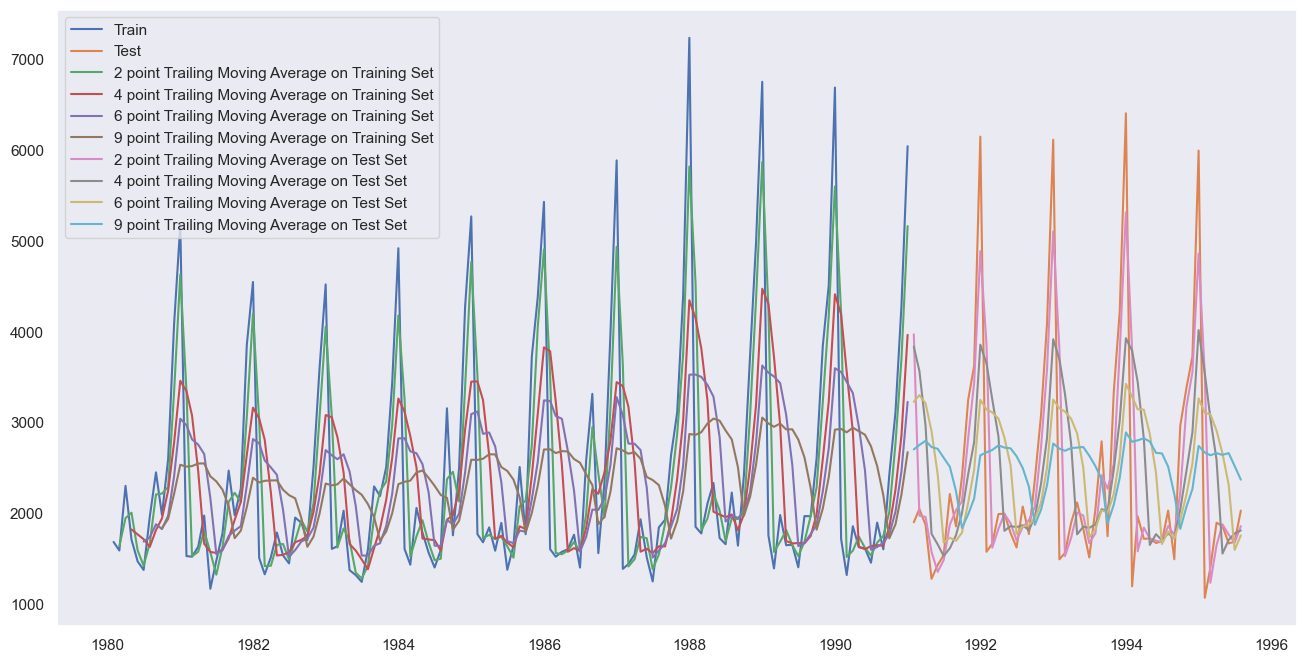

In [479]:
plt.figure(figsize=(16,8))

plt.plot(trailing_MovingAverage_train["Sparkling"], label="Train")
plt.plot(trailing_MovingAverage_test["Sparkling"], label="Test")

plt.plot(trailing_MovingAverage_train["Trailing_2"], label="2 point Trailing Moving Average on Training Set")
plt.plot(trailing_MovingAverage_train["Trailing_4"], label="4 point Trailing Moving Average on Training Set")
plt.plot(trailing_MovingAverage_train["Trailing_6"], label="6 point Trailing Moving Average on Training Set")
plt.plot(trailing_MovingAverage_train["Trailing_9"], label="9 point Trailing Moving Average on Training Set")

plt.plot(trailing_MovingAverage_test["Trailing_2"], label="2 point Trailing Moving Average on Test Set")
plt.plot(trailing_MovingAverage_test["Trailing_4"], label="4 point Trailing Moving Average on Test Set")
plt.plot(trailing_MovingAverage_test["Trailing_6"], label="6 point Trailing Moving Average on Test Set")
plt.plot(trailing_MovingAverage_test["Trailing_9"], label="9 point Trailing Moving Average on Test Set")

plt.legend(loc="best")
plt.grid()
plt.show()

Model Evaluation

In [480]:
rmse_model4_test_2 = rmse(test["Sparkling"], trailing_MovingAverage_test["Trailing_2"])
print("Rmse for trailing_2", rmse_model4_test_2)

rmse_model4_test_4 = rmse(test["Sparkling"], trailing_MovingAverage_test["Trailing_4"])
print("Rmse for trailing_4", rmse_model4_test_4)

rmse_model4_test_6 = rmse(test["Sparkling"], trailing_MovingAverage_test["Trailing_6"])
print("Rmse for trailing_6", rmse_model4_test_6)


rmse_model4_test_9 = rmse(test["Sparkling"], trailing_MovingAverage_test["Trailing_9"])
print("Rmse for trailing_9", rmse_model4_test_9)

resultsDf_4 = pd.DataFrame({"Test RMSE": [rmse_model4_test_2, rmse_model4_test_4, rmse_model4_test_6, rmse_model4_test_9]},
                          index = ["2_point_trailing_Moving_Average", "4_point_trailing_Moving_Average", "6_point_trailing_Moving_Average", "9_point_trailing_Moving_Average"])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Rmse for trailing_2 813.4006839972983
Rmse for trailing_4 1156.589694081071
Rmse for trailing_6 1283.9274280129855
Rmse for trailing_9 1346.2783154241804


Test RMSE
RegressionOnTime                 1389.135175
NaiveModel                       3864.279352
SimpleAverageModel               1275.081804
2_point_trailing_Moving_Average   813.400684
4_point_trailing_Moving_Average  1156.589694
6_point_trailing_Moving_Average  1283.927428
9_point_trailing_Moving_Average  1346.278315

Plot of all models derived till now

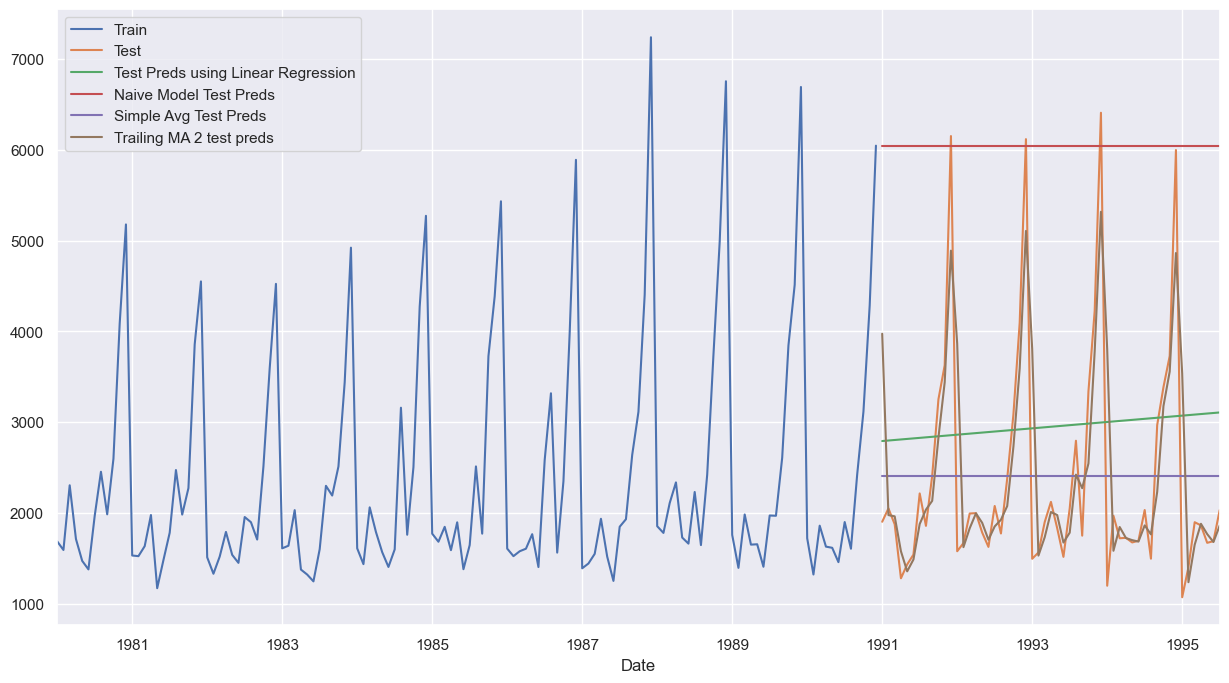

In [481]:
train["Sparkling"].plot(legend=True, label="Train")
test["Sparkling"].plot(legend=True, label="Test")

LinearRegression_test["RegOnTime"].plot(legend=True, label="Test Preds using Linear Regression")

NaiveModel_test["naive"].plot(legend=True, label="Naive Model Test Preds")

SimpleAverage_test["mean_Sparkling"].plot(legend=True, label="Simple Avg Test Preds")

trailing_MovingAverage_test["Trailing_2"].plot(legend=True, label="Trailing MA 2 test preds")

plt.show()

# Simple exponential smoothening – RMSE analysis

In [482]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

'SES Params'

{'smoothing_level': 0.04960736049406556,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2151.614314422547,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

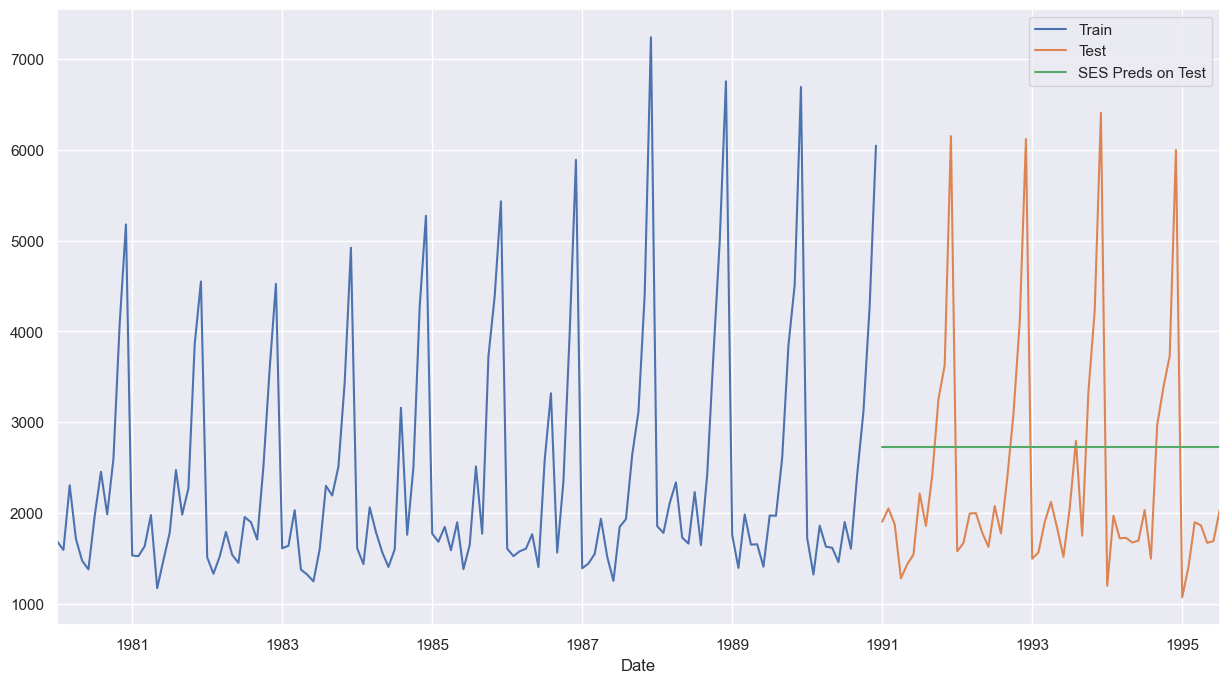

In [483]:
SES_train = train.copy()
SES_test = test.copy()

model_SES = SimpleExpSmoothing(SES_train["Sparkling"]);

model_SES_autofit = model_SES.fit()

display("SES Params", model_SES_autofit.params)

SES_test["predict"] = model_SES_autofit.forecast(steps=len(test))

display(SES_test.head().style)

SES_train["Sparkling"].plot(legend=True, label="Train")
SES_test["Sparkling"].plot(legend=True, label="Test")
SES_test["predict"].plot(legend=True, label="SES Preds on Test")
plt.show()


## Model Evaluation

In [484]:
rmse_model5_test_1 = rmse(SES_test["Sparkling"], SES_test["predict"])
display(rmse_model5_test_1)

resultsDf_5 = pd.DataFrame({"Test RMSE": [rmse_model5_test_1]}, index=["Alpha=0.03,SimpleExponentialSmoothing"])
resultsDf = pd.concat([resultsDf, resultsDf_5])
display(resultsDf)


1316.1354111921867

Test RMSE
RegressionOnTime                       1389.135175
NaiveModel                             3864.279352
SimpleAverageModel                     1275.081804
2_point_trailing_Moving_Average         813.400684
4_point_trailing_Moving_Average        1156.589694
6_point_trailing_Moving_Average        1283.927428
9_point_trailing_Moving_Average        1346.278315
Alpha=0.03,SimpleExponentialSmoothing  1316.135411

## Set different alpha values

In [485]:
resultsDf_6 = pd.DataFrame({"Alpha Values":[], "Train RMSE": [], "Test RMSE": []})


alpha_list = [0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in alpha_list:
    model_SES_alpha_i = model_SES.fit(smoothing_level=i)
    
    SES_train["predict",i] = model_SES_alpha_i.fittedvalues
    SES_test["predict",i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model5_train_i = rmse(SES_train["Sparkling"],SES_train["predict",i])
        
    rmse_model5_test_i = rmse(SES_test["Sparkling"],SES_test["predict",i])
    
    resultsDf_6 = resultsDf_6.append({"Alpha Values":i,
                                      "Train RMSE": rmse_model5_train_i,"Test RMSE":rmse_model5_test_i}, 
                                     ignore_index=True)
    
display(SES_test.head().style)

display("Model Evaluation", resultsDf_6.sort_values(by=["Test RMSE"],ascending=True))



'Model Evaluation'

Alpha Values   Train RMSE    Test RMSE
0           0.3  1359.422161  1935.507132
1           0.4  1352.562367  2311.919615
2           0.5  1343.994119  2666.351413
3           0.6  1338.801426  2979.204388
4           0.7  1338.843297  3249.944092
5           0.8  1344.462034  3483.801006
6           0.9  1355.723496  3686.794285

## Plot

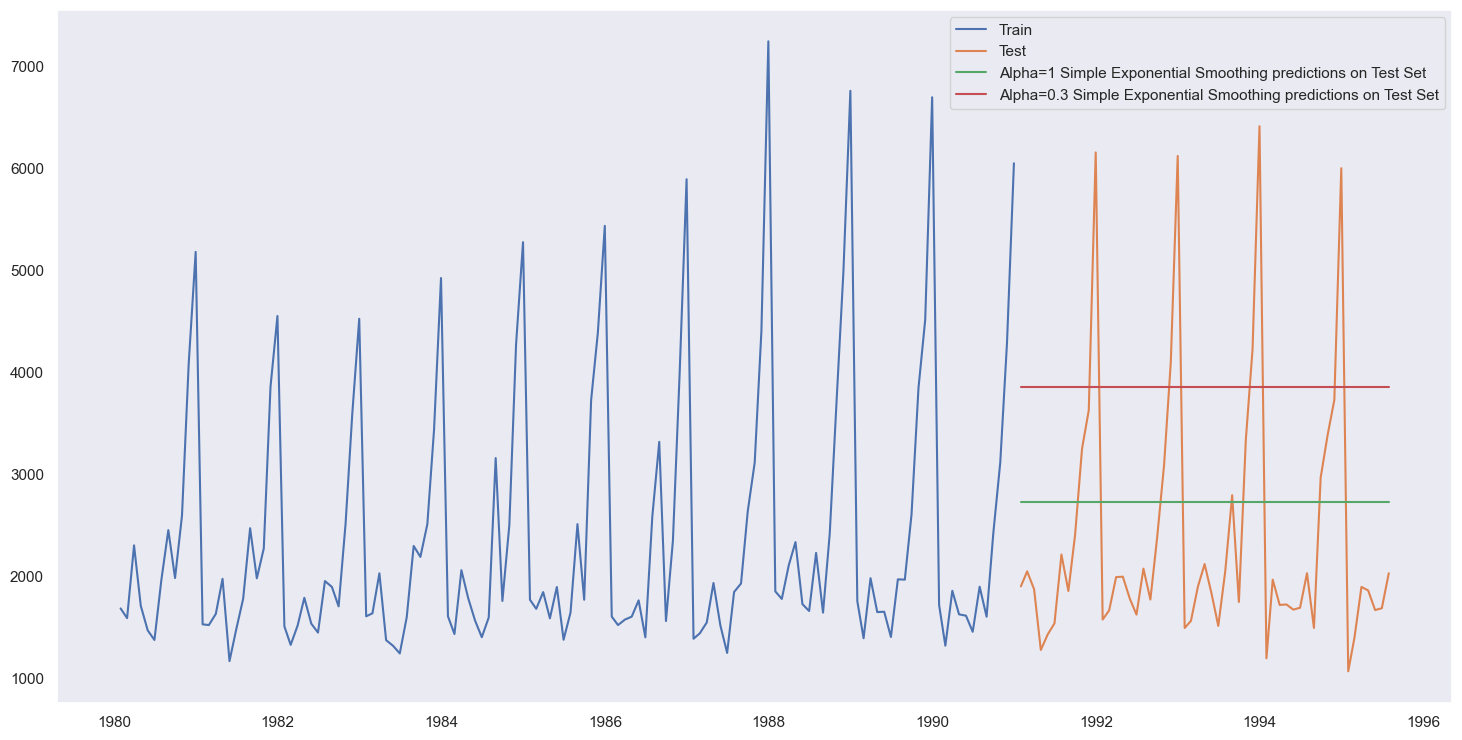

In [486]:
plt.figure(figsize=(18,9))
plt.plot(SES_train["Sparkling"], label="Train")
plt.plot(SES_test["Sparkling"], label="Test")
plt.plot(SES_test["predict"], label="Alpha=1 Simple Exponential Smoothing predictions on Test Set")
plt.plot(SES_test["predict", 0.3], label="Alpha=0.3 Simple Exponential Smoothing predictions on Test Set")
plt.legend(loc="best")
plt.grid()
plt.show()

In [487]:
resultsDf_6_1 = pd.DataFrame({"Test RMSE": [resultsDf_6.sort_values(by=["Test RMSE"], ascending=True).values[0][2]]},
                          index = ["Alpha=0.4,SimpleExponentialSmoothing"])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])

display(resultsDf.style)

# Double exponential smoothening (Holt’s method) – RMSE analysis

## RMSE for alpha and beta values

In [488]:
DES_train = train.copy()
DES_test = test.copy()

model_DES = Holt(DES_train["Sparkling"])

resultsDf_7 = pd.DataFrame({"Alpha Values": [], "Beta Values": [], "Train RMSE": [], "Test RMSE": []})

alpha_list = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
beta_list = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for i in alpha_list:
    for j in beta_list:
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j)
        
        DES_train["predict",i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test["predict",i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        rmse_model6_train = rmse(DES_train["Sparkling"],DES_train["predict",i,j])
        
        rmse_model6_test = rmse(DES_test["Sparkling"],DES_test["predict",i,j])
        
        resultsDf_7 = resultsDf_7.append({"Alpha Values":i,
                                          "Beta Values":j,
                                          "Train RMSE": rmse_model6_train,
                                          "Test RMSE": rmse_model6_test}, ignore_index=True)
        
display(resultsDf_7.sort_values(by=["Test RMSE"]).head(10))        


Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.3          0.3  1590.151685  18259.110704
8            0.4          0.3  1568.527728  23878.496940
1            0.3          0.4  1680.813420  26069.841401
16           0.5          0.3  1530.223975  27095.532414
24           0.6          0.3  1506.223118  29070.722592
32           0.7          0.3  1500.508563  30524.407568
40           0.8          0.3  1508.999847  31689.588069
9            0.4          0.4  1631.598723  32084.192549
48           0.9          0.3  1528.779355  32650.778085
56           1.0          0.3  1559.937648  33462.024859

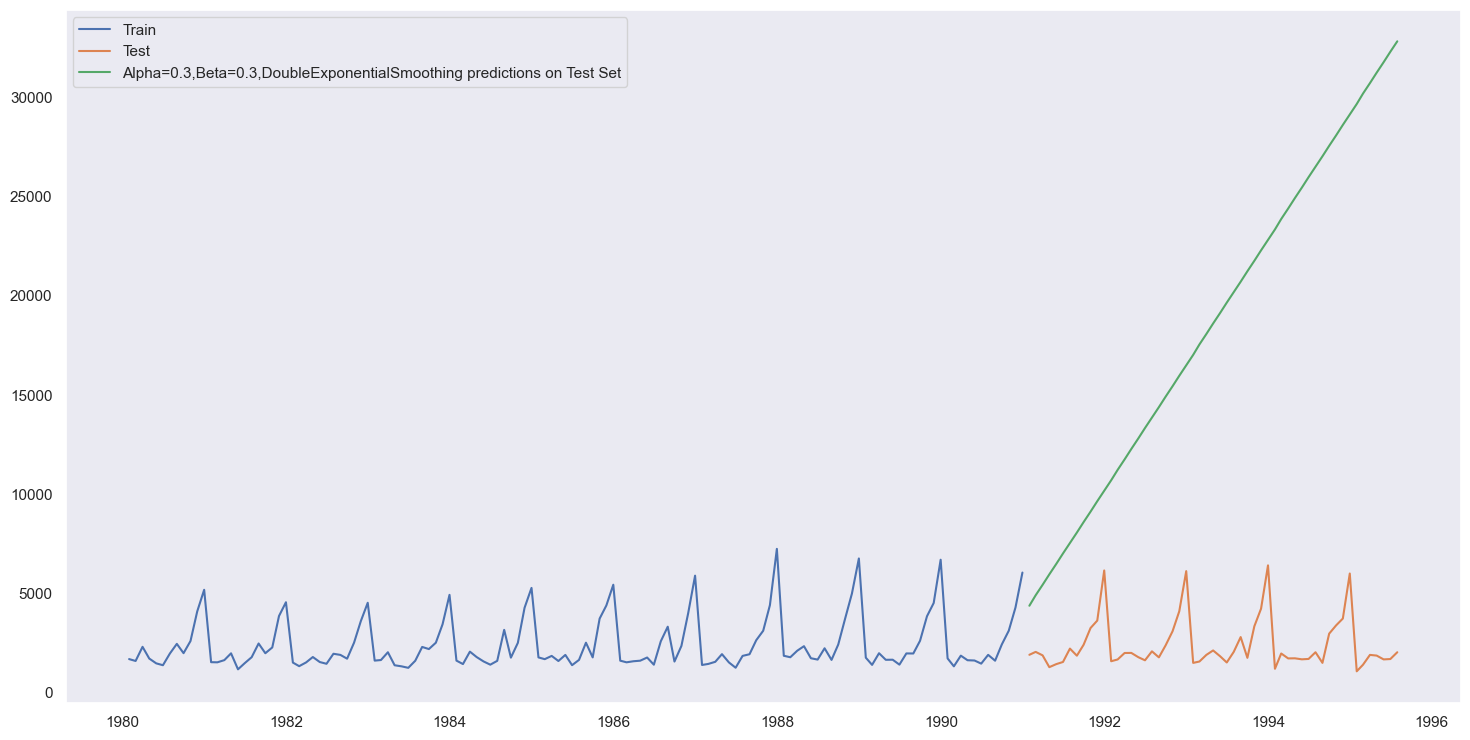

In [489]:
plt.figure(figsize=(18,9))
plt.plot(DES_train["Sparkling"], label="Train")
plt.plot(DES_test["Sparkling"], label="Test")

plt.plot(DES_test["predict", 0.3, 0.3],  label="Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set")
plt.legend(loc="best")
plt.grid()
plt.show()

In [490]:
resultsDf_7_1 = pd.DataFrame({"Test RMSE": [resultsDf_7.sort_values(by=["Test RMSE"]).values[0][3]]}, index=["Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing"])
resultsDf = pd.concat([resultsDf, resultsDf_7_1])
display(resultsDf)

Test RMSE
RegressionOnTime                                1389.135175
NaiveModel                                      3864.279352
SimpleAverageModel                              1275.081804
2_point_trailing_Moving_Average                  813.400684
4_point_trailing_Moving_Average                 1156.589694
6_point_trailing_Moving_Average                 1283.927428
9_point_trailing_Moving_Average                 1346.278315
Alpha=0.03,SimpleExponentialSmoothing           1316.135411
Alpha=0.4,SimpleExponentialSmoothing            1935.507132
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing  18259.110704

# Triple exponential smoothening (Holt’s winter model) – RMSE analysis

{'smoothing_level': 0.11108840858679117,
 'smoothing_trend': 0.061712060020663685,
 'smoothing_seasonal': 0.3950814802151603,
 'damping_trend': nan,
 'initial_level': 1639.9088356475902,
 'initial_trend': -11.928143593549056,
 'initial_seasons': array([1.05065032, 1.02086214, 1.41078482, 1.20263518, 0.97315225,
        0.96689379, 1.31724304, 1.70471609, 1.37289733, 1.81035002,
        2.83962708, 3.60997333]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Sparkling  auto_predict
Date                               
1991-01-31       1902        1577.0
1991-02-28       2049        1334.0
1991-03-31       1874        1746.0
1991-04-30       1279        1630.0
1991-05-31       1432        1523.0

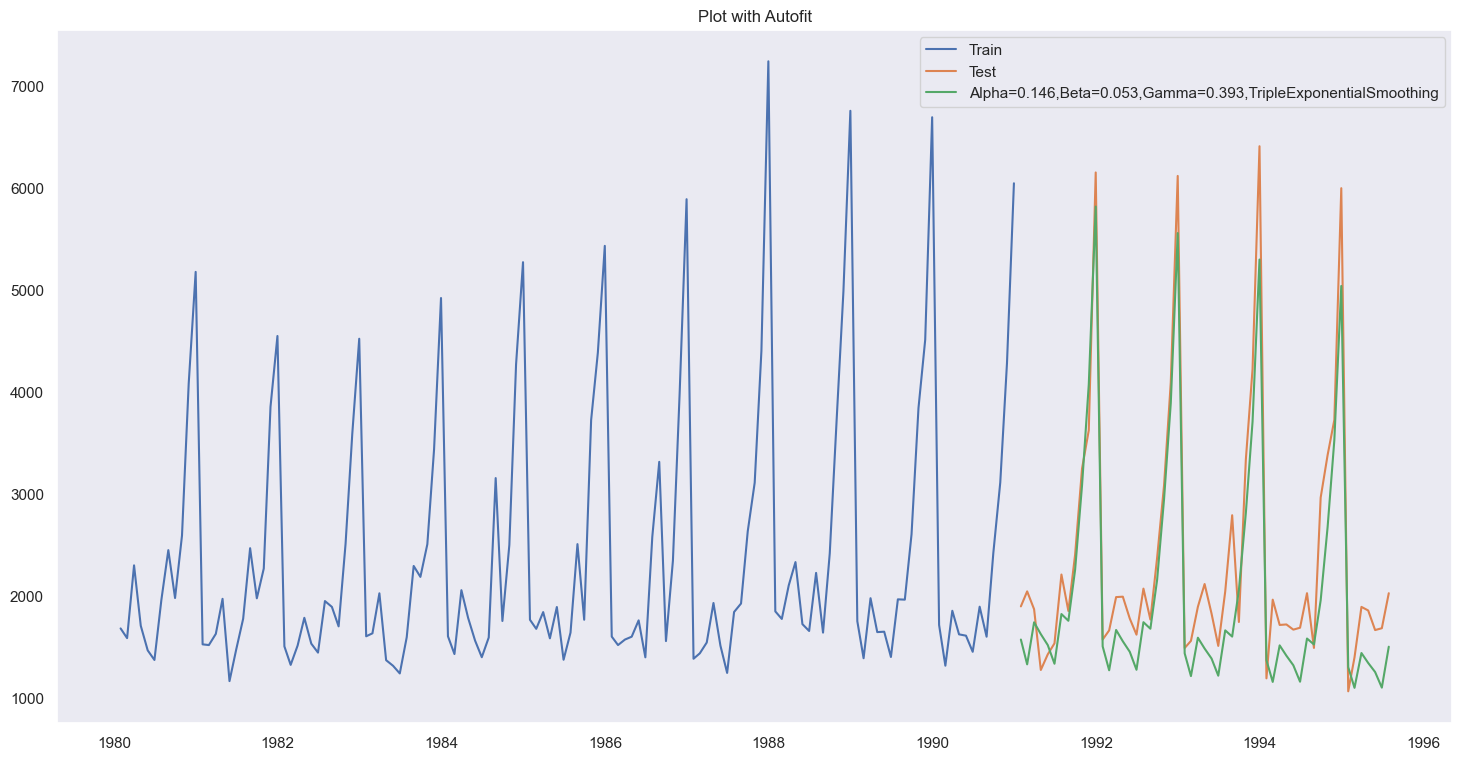

In [491]:
TES_train = train.copy()
TES_test = test.copy()

model_TES = ExponentialSmoothing(TES_train["Sparkling"], trend="additive", seasonal="multiplicative", freq="M")

model_TES_autofit = model_TES.fit()

display(model_TES_autofit.params)


TES_test["auto_predict"] = model_TES_autofit.forecast(steps=len(test)).round(0)
display(TES_test.head())

plt.figure(figsize=(18,9))
plt.plot(TES_train["Sparkling"], label="Train")
plt.plot(TES_test["Sparkling"], label="Test")
plt.plot(TES_test["auto_predict"], label="Alpha=0.146,Beta=0.053,Gamma=0.393,TripleExponentialSmoothing")
plt.legend(loc="best")
plt.title("Plot with Autofit")
plt.grid()

plt.show()



## RMSE

In [492]:
rmse_model6_test_1 = rmse(TES_test["Sparkling"], TES_test["auto_predict"])
display(rmse_model6_test_1)

resultsDf_8_1 = pd.DataFrame({"Test RMSE": [rmse_model6_test_1]}, index=["Alpha=0.146,Beta=0.053,Gamma=0.393,TripleExponentialSmoothing"])
resultsDf = pd.concat([resultsDf, resultsDf_8_1])
display(resultsDf)

469.65604435586687

Test RMSE
RegressionOnTime                                     1389.135175
NaiveModel                                           3864.279352
SimpleAverageModel                                   1275.081804
2_point_trailing_Moving_Average                       813.400684
4_point_trailing_Moving_Average                      1156.589694
6_point_trailing_Moving_Average                      1283.927428
9_point_trailing_Moving_Average                      1346.278315
Alpha=0.03,SimpleExponentialSmoothing                1316.135411
Alpha=0.4,SimpleExponentialSmoothing                 1935.507132
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha=0.146,Beta=0.053,Gamma=0.393,TripleExpone...    469.656044

## Identify best alpha, beta and gamma

In [493]:
resultsDf_8_2 = pd.DataFrame({"Alpha Values":[],"Beta Values":[],"Gamma Values":[],"Train RMSE":[],"Test RMSE": []})


gamma_list = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]


for i in alpha_list:
    for j in beta_list:
        for k in gamma_list:
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,
                                                  smoothing_trend=j,
                                                  smoothing_seasonal=k)
            
            TES_train["predict",i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            
            TES_test["predict",i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model8_train = rmse(TES_train["Sparkling"],
                                     TES_train["predict",i,j,k])
            
            rmse_model8_test = rmse(TES_test["Sparkling"],
                                    TES_test["predict",i,j,k])
            
            resultsDf_8_2 = resultsDf_8_2.append({"Alpha Values":i,
                                                  "Beta Values":j,
                                                  "Gamma Values":k,
                                                  "Train RMSE":rmse_model8_train,
                                                  "Test RMSE":rmse_model8_test},ignore_index=True)
            
display(TES_test.head().style)
display(resultsDf_8_2.sort_values(by=["Test RMSE"]).head())


resultsDf_8_3 = pd.DataFrame({"Test RMSE": [resultsDf_8_2.sort_values(by=["Test RMSE"]).values[0][4]]}
                           ,index=["Alpha=0.7,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing"])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
display(resultsDf.sort_values(by=["Test RMSE"]))



Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE
0             0.3          0.3           0.3  393.061188  343.618889
66            0.4          0.3           0.5  438.066407  412.651659
131           0.5          0.3           0.6  521.672404  441.526658
296           0.7          0.8           0.3  700.317756  518.188752
9             0.3          0.4           0.4  414.613110  579.114027

Test RMSE
Alpha=0.7,Beta=0.3,Gamma=0.3,TripleExponentialS...    343.618889
Alpha=0.146,Beta=0.053,Gamma=0.393,TripleExpone...    469.656044
2_point_trailing_Moving_Average                       813.400684
4_point_trailing_Moving_Average                      1156.589694
SimpleAverageModel                                   1275.081804
6_point_trailing_Moving_Average                      1283.927428
Alpha=0.03,SimpleExponentialSmoothing                1316.135411
9_point_trailing_Moving_Average                      1346.278315
RegressionOnTime                                     1389.135175
Alpha=0.4,SimpleExponentialSmoothing                 1935.507132
NaiveModel                                           3864.279352
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704

## Plot SES, DES and TES

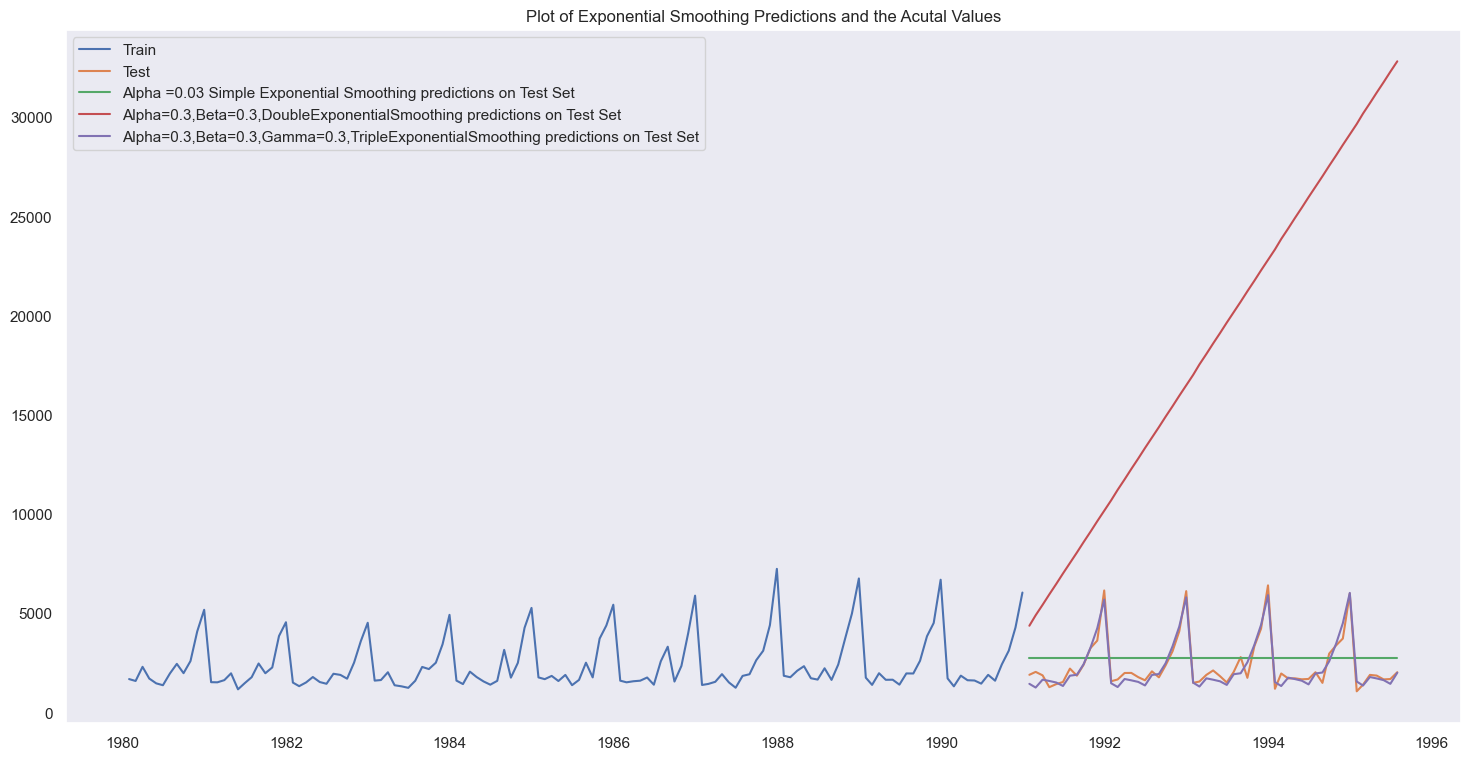

In [494]:
plt.figure(figsize=(18,9))
plt.plot(train["Sparkling"], label="Train")
plt.plot(test["Sparkling"], label="Test")

plt.plot(SES_test["predict"], label="Alpha =0.03 Simple Exponential Smoothing predictions on Test Set")

plt.plot(DES_test["predict", 0.3, 0.3], label="Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set")

plt.plot(TES_test["predict", 0.3, 0.3, 0.3], label="Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set")

plt.legend(loc="best")
plt.grid();
plt.title("Plot of Exponential Smoothing Predictions and the Acutal Values");
plt.show()

## Training TES model with full data

'RMSE'

421.30973568663114

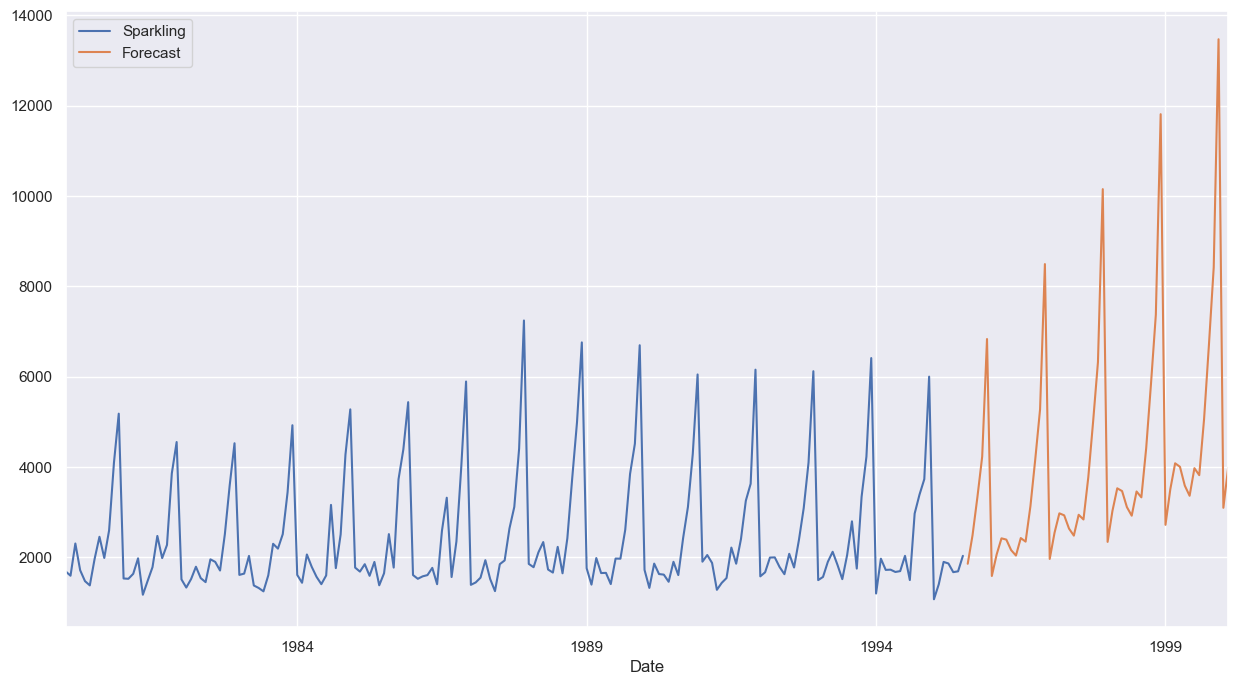

In [495]:
fullmodel1 = ExponentialSmoothing(spdf,trend="additive",seasonal="multiplicative")
fullmodel1= fullmodel1.fit(smoothing_level=0.3, smoothing_trend=0.3, smoothing_seasonal=0.3)

RMSE_fullmodel1 = rmse(spdf["Sparkling"], fullmodel1.fittedvalues)
display("RMSE", RMSE_fullmodel1)

prediction_1 = fullmodel1.forecast(steps=len(test))

spdf.plot(legend=True, label="Actual")
prediction_1.plot(legend=True, label="Forecast")

plt.show()


## Margin of Error

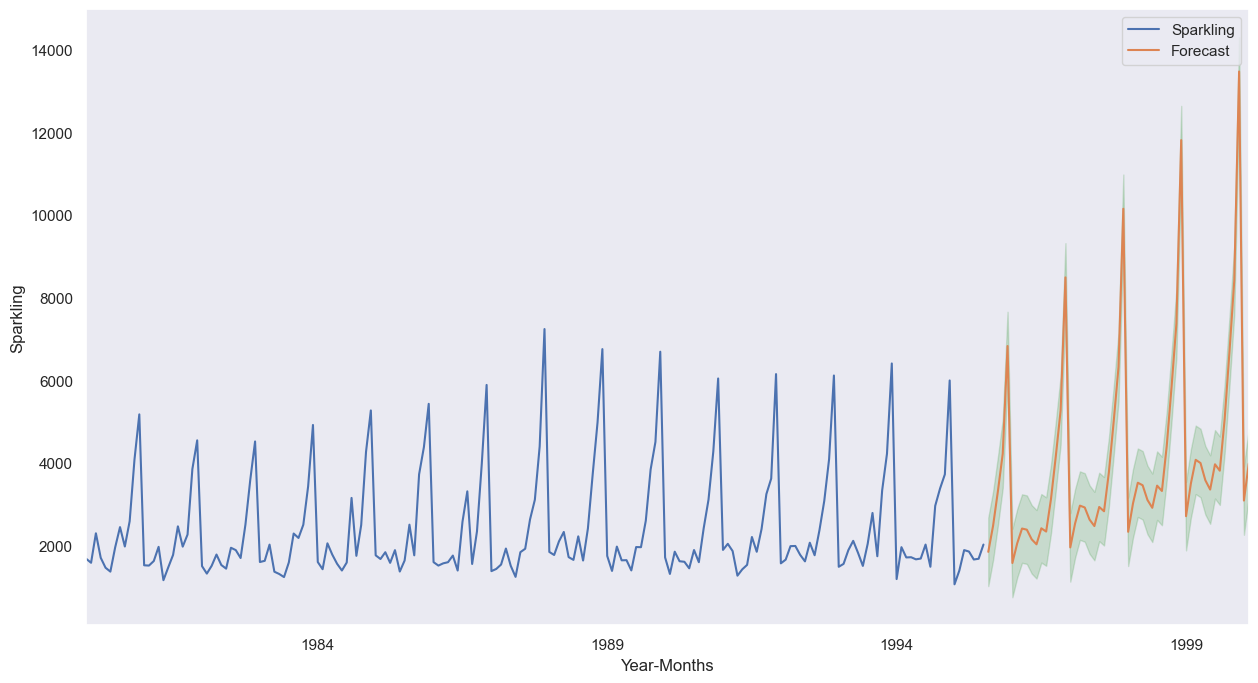

In [496]:
pred_1_df = pd.DataFrame({"lower_CI":prediction_1 - 1.96*fullmodel1.resid.std(),
                          "prediction":prediction_1,
                          "upper_ci": prediction_1 + 1.96*fullmodel1.resid.std()})
display(pred_1_df.head().style)


axis = spdf.plot(label="Actual", figsize=(15,8))
pred_1_df["prediction"].plot(ax=axis, label="Forecast", alpha=1) # alpha here is for transparency of the prediction line

axis.fill_between(pred_1_df.index, pred_1_df["lower_CI"], pred_1_df["upper_ci"], color="green", alpha=.15) # alpha here denotes the transparency of the shaded region

axis.set_xlabel("Year-Months")
axis.set_ylabel("Sparkling")
plt.legend(loc="best")
plt.grid()
plt.show();

# Build ARIMA model with lowest AIC score – test this model on test data using RMSE

## Automated AIC 

In [497]:
import itertools # library for generating all possible combinations of given number sets
from statsmodels.tsa.arima_model import ARIMA

p = q = range(0, 4)
d= range(1,2) # required as itertools product function expects the parameters as range objects, even if it is only value

pdq = list(itertools.product(p, d, q))
 
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=["Param", "AIC"])
ARIMA_AIC

for param in pdq:
    ARIMA_model = ARIMA(train["Sparkling"], order=param).fit()
    
    display(f"ARIMA{param} - AIC:{ARIMA_model.aic}")
    
    ARIMA_AIC=ARIMA_AIC.append({"Param":param, "AIC": ARIMA_model.aic}, ignore_index=True)
    
display(ARIMA_AIC.sort_values(by=["AIC"],ascending=True))    

'ARIMA(0, 1, 0) - AIC:2269.582796371201'

'ARIMA(0, 1, 1) - AIC:2264.906438611577'

'ARIMA(0, 1, 2) - AIC:2232.7830976841233'

'ARIMA(0, 1, 3) - AIC:2233.0166051379524'

'ARIMA(1, 1, 0) - AIC:2268.5280606259744'

'ARIMA(1, 1, 1) - AIC:2235.013945349901'

'ARIMA(1, 1, 2) - AIC:2233.5976471190174'

'ARIMA(1, 1, 3) - AIC:2234.5741415463535'

'ARIMA(2, 1, 0) - AIC:2262.035600157607'

'ARIMA(2, 1, 1) - AIC:2232.3604898840485'

'ARIMA(2, 1, 2) - AIC:2210.621173780754'

'ARIMA(2, 1, 3) - AIC:2229.3580937723214'

'ARIMA(3, 1, 0) - AIC:2259.471554711154'

'ARIMA(3, 1, 1) - AIC:2233.921768799295'

'ARIMA(3, 1, 2) - AIC:2228.9282803019664'

'ARIMA(3, 1, 3) - AIC:2225.6615585250906'

Param          AIC
10  (2, 1, 2)  2210.621174
15  (3, 1, 3)  2225.661559
14  (3, 1, 2)  2228.928280
11  (2, 1, 3)  2229.358094
9   (2, 1, 1)  2232.360490
2   (0, 1, 2)  2232.783098
3   (0, 1, 3)  2233.016605
6   (1, 1, 2)  2233.597647
13  (3, 1, 1)  2233.921769
7   (1, 1, 3)  2234.574142
5   (1, 1, 1)  2235.013945
12  (3, 1, 0)  2259.471555
8   (2, 1, 0)  2262.035600
1   (0, 1, 1)  2264.906439
4   (1, 1, 0)  2268.528061
0   (0, 1, 0)  2269.582796

In [498]:
auto_ARIMA = ARIMA(train["Sparkling"], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

display(results_auto_ARIMA.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.311
Method:                       css-mle   S.D. of innovations           1013.252
Date:                Sun, 15 Aug 2021   AIC                           2210.621
Time:                        18:35:13   BIC                           2227.872
Sample:                    02-29-1980   HQIC                          2217.631
                         - 12-31-1990                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5853      0.518     10.792      0.000       4.571       6.600
ar.L1.D.Sparkling     1.2699      0.075     17.043      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.5602      0.074     -7.618      0.000      -0.704      -0.416
ma.L1.D.Sparkling    -1.9967      0.042    -47.031      0.000      -2.080      -1.913
ma.L2.D.Sparkling     0.9967      0.043     23.432      0.000       0.913       1.080
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1335           -0.7074j            1.3361           -0.0888
AR.2            1.1335           +0.7074j            1.3361            0.0888
MA.1            1.0003           +0.0000j            1.0003            0.0000
MA.2            1.0030           +0.0000j            1.0030            0.0000
-----------------------------------------------------------------------------
"""

## Prediction

In [499]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

RMSE_autoarima = rmse(test["Sparkling"],predicted_auto_ARIMA[0])
display(RMSE_autoarima)

resultsDf_arima = pd.DataFrame({'Test RMSE': [RMSE_autoarima]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_arima])

display(resultsDf)

1374.3117112401214

Test RMSE
RegressionOnTime                                     1389.135175
NaiveModel                                           3864.279352
SimpleAverageModel                                   1275.081804
2_point_trailing_Moving_Average                       813.400684
4_point_trailing_Moving_Average                      1156.589694
6_point_trailing_Moving_Average                      1283.927428
9_point_trailing_Moving_Average                      1346.278315
Alpha=0.03,SimpleExponentialSmoothing                1316.135411
Alpha=0.4,SimpleExponentialSmoothing                 1935.507132
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha=0.146,Beta=0.053,Gamma=0.393,TripleExpone...    469.656044
Alpha=0.7,Beta=0.3,Gamma=0.3,TripleExponentialS...    343.618889
ARIMA(2,1,2)                                         1374.311711

## Stationarity check with AdFuller

In [500]:
from statsmodels.tsa.stattools import adfuller

display("Results of Dickey-Fuller Test:")
dftest = adfuller(spdf["Sparkling"])

dfoutput = pd.Series(dftest[0:4], index=["Test Statistic","p-value","#Lags Used","Number of Observations Used"])

for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value

display(dfoutput)
display("P Value: ", dftest[1], "H0 rejected and the time series is stationary")

'Results of Dickey-Fuller Test:'

Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64

'P Value: '

0.6010608871634866

'H0 rejected and the time series is stationary'

## Manual Arima using ACF and PACF plots

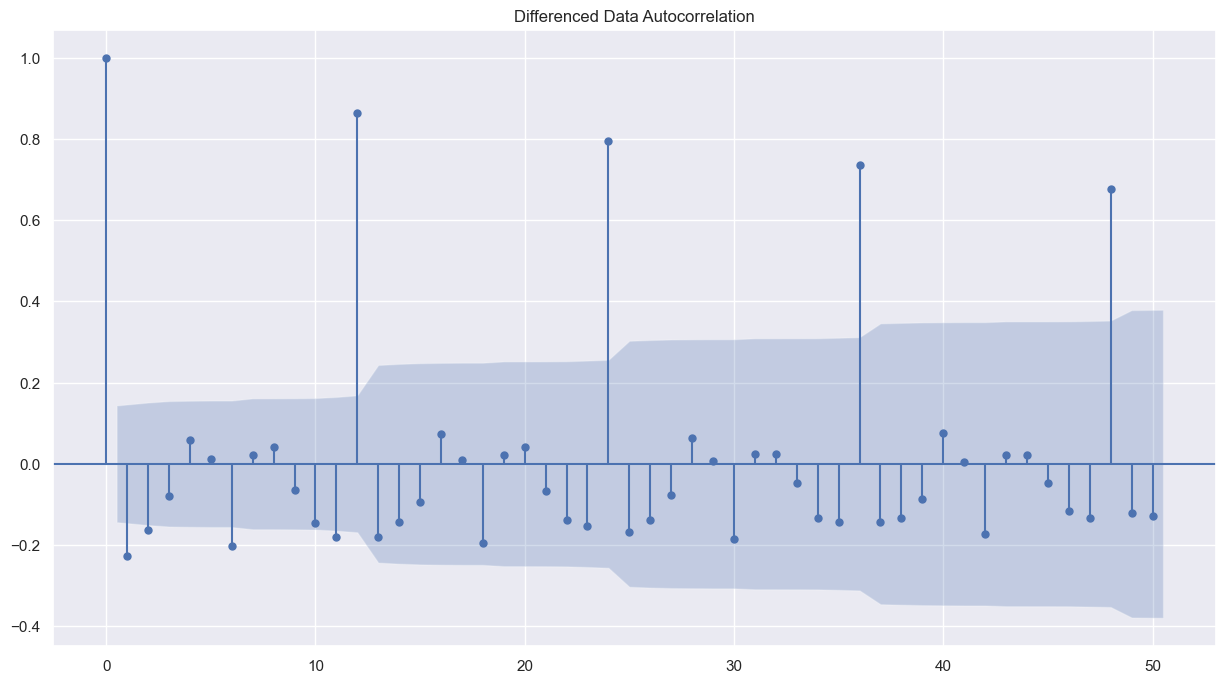

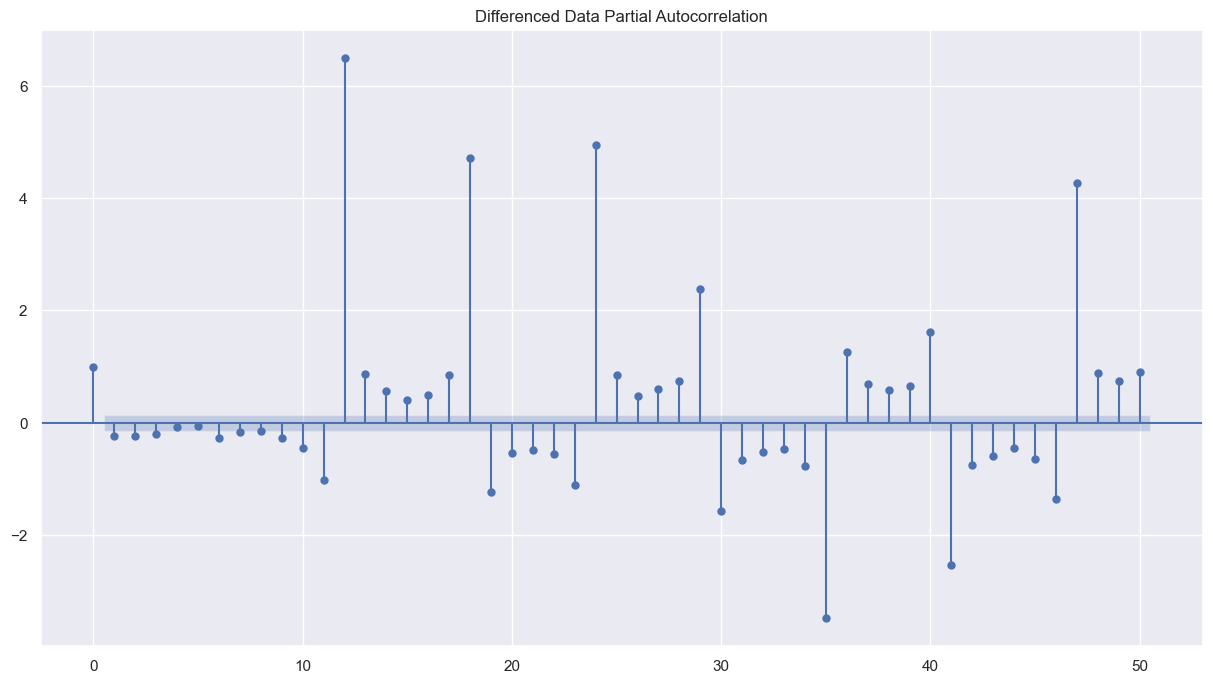

'p value from PACF: 3 & q value from ACF: 2'

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1107.464
Method:                       css-mle   S.D. of innovations           1106.327
Date:                Sun, 15 Aug 2021   AIC                           2228.928
Time:                        18:35:15   BIC                           2249.055
Sample:                    02-29-1980   HQIC                          2237.107
                         - 12-31-1990                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.9574      3.643      1.635      0.102      -1.184      13.099
ar.L1.D.Sparkling    -0.4424   2.11e-05   -2.1e+04      0.000      -0.442      -0.442
ar.L2.D.Sparkling     0.3080   7.38e-05   4171.718      0.000       0.308       0.308
ar.L3.D.Sparkling    -0.2496   5.94e-05  -4205.282      0.000      -0.250      -0.249
ma.L1.D.Sparkling    -0.0009      0.019     -0.045      0.964      -0.039       0.037
ma.L2.D.Sparkling    -0.9991      0.019    -51.796      0.000      -1.037      -0.961
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0000           -0.0000j            1.0000           -0.5000
AR.2            1.1170           -1.6610j            2.0017           -0.1558
AR.3            1.1170           +1.6610j            2.0017            0.1558
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.0009           +0.0000j            1.0009            0.5000
-----------------------------------------------------------------------------
"""

Test RMSE
RegressionOnTime                                     1389.135175
NaiveModel                                           3864.279352
SimpleAverageModel                                   1275.081804
2_point_trailing_Moving_Average                       813.400684
4_point_trailing_Moving_Average                      1156.589694
6_point_trailing_Moving_Average                      1283.927428
9_point_trailing_Moving_Average                      1346.278315
Alpha=0.03,SimpleExponentialSmoothing                1316.135411
Alpha=0.4,SimpleExponentialSmoothing                 1935.507132
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha=0.146,Beta=0.053,Gamma=0.393,TripleExpone...    469.656044
Alpha=0.7,Beta=0.3,Gamma=0.3,TripleExponentialS...    343.618889
ARIMA(2,1,2)                                         1374.311711
Manual ARIMA(3,1,2)                                  1378.094442

In [501]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(spdf["Sparkling"].diff().dropna(),lags=50,title='Differenced Data Autocorrelation');
plot_pacf(spdf["Sparkling"].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation');
plt.show()

display("p value from PACF: 3 & q value from ACF: 2")

manual_ARIMA = ARIMA(train["Sparkling"].astype("float64"), order=(3,1,2),freq="M")
results_manual_ARIMA = manual_ARIMA.fit()
display(results_manual_ARIMA.summary())

predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

RMSE_manualarima = rmse(test["Sparkling"],
                        predicted_manual_ARIMA[0])

resultsDf_manual_arima = pd.DataFrame({'Test RMSE': [RMSE_manualarima]}
                           ,index=['Manual ARIMA(3,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_manual_arima])

display(resultsDf)

# Build SARIMA model with lowest AIC score – test this model on test data using RMSE

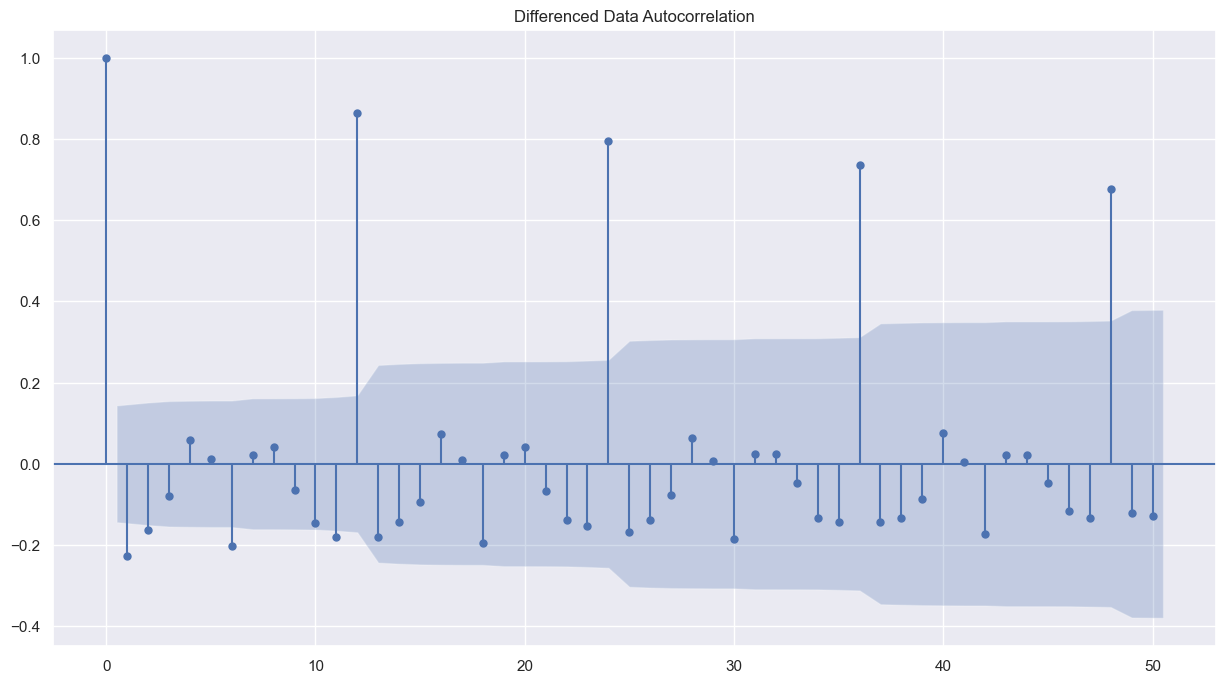

'Seasonality is observed for 6 and 12'

In [502]:
plot_acf(spdf["Sparkling"].diff().dropna(),lags=50,title="Differenced Data Autocorrelation");
plt.show()

display("Seasonality is observed for 6 and 12")

## Automated AIC for seasonality 6

In [503]:
from  statsmodels.tsa.statespace.sarimax import SARIMAX

p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))] # seasonal PDQ


SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])




In [504]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = SARIMAX(train["Sparkling"],order=param, 
                               seasonal_order = param_seasonal,enforce_stationarity=False,
                               enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        
        SARIMA_AIC = SARIMA_AIC.append({"param":param,
                                        "seasonal":param_seasonal, 
                                        "AIC": results_SARIMA.aic},
                                       ignore_index=True)


In [505]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 6)  1727.666979
26  (0, 1, 2)  (2, 0, 2, 6)  1727.888803
80  (2, 1, 2)  (2, 0, 2, 6)  1729.153774
17  (0, 1, 1)  (2, 0, 2, 6)  1741.703671
44  (1, 1, 1)  (2, 0, 2, 6)  1743.379778

In [506]:
auto_SARIMA_6 = SARIMAX(train["Sparkling"].values,
                       order=(1,1,2),
                       seasonal_order=(2,0,2,6),
                       enforce_stationarity=False,
                       enforce_ivertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
display(results_auto_SARIMA_6.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -857.437
Date:                           Sun, 15 Aug 2021   AIC                           1730.874
Time:                                   18:36:35   BIC                           1752.902
Sample:                                        0   HQIC                          1739.816
                                           - 132                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6339      0.220     -2.877      0.004      -1.066      -0.202
ma.L1         -0.1876      0.234     -0.802      0.423      -0.646       0.271
ma.L2         -0.8123      0.171     -4.747      0.000      -1.148      -0.477
ar.S.L6       -0.0170      0.033     -0.510      0.610      -0.082       0.048
ar.S.L12       1.0230      0.021     47.746      0.000       0.981       1.065
ma.S.L6        0.1487      0.167      0.892      0.373      -0.178       0.475
ma.S.L12      -0.5516      0.111     -4.974      0.000      -0.769      -0.334
sigma2      1.453e+05   1.43e-06   1.01e+11      0.000    1.45e+05    1.45e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                15.49
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               2.74   Skew:                             0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.71e+26. Standard errors may be unstable.
"""

## Prediction on the Test Set and Evaluation

In [507]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

display(predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head())

rmse_autosarima6 = rmse(test["Sparkling"], predicted_auto_SARIMA_6.predicted_mean)
display(rmse_autosarima6)

temp_resultsDf = pd.DataFrame({"Test RMSE" : [rmse_autosarima6]}, index = ["SARIMA(1,1,2)(2,0,2,6)"])
resultsDf = pd.concat([resultsDf, temp_resultsDf])

display(resultsDf)


y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1550.985488  383.019057     800.281931    2301.689045
1  1418.944299  389.744321     655.059466    2182.829132
2  1894.695343  391.659093    1127.057626    2662.333060
3  1783.949634  392.896210    1013.887213    2554.012055
4  1495.508336  393.094407     725.057456    2265.959216

459.6438474254296

Test RMSE
RegressionOnTime                                     1389.135175
NaiveModel                                           3864.279352
SimpleAverageModel                                   1275.081804
2_point_trailing_Moving_Average                       813.400684
4_point_trailing_Moving_Average                      1156.589694
6_point_trailing_Moving_Average                      1283.927428
9_point_trailing_Moving_Average                      1346.278315
Alpha=0.03,SimpleExponentialSmoothing                1316.135411
Alpha=0.4,SimpleExponentialSmoothing                 1935.507132
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha=0.146,Beta=0.053,Gamma=0.393,TripleExpone...    469.656044
Alpha=0.7,Beta=0.3,Gamma=0.3,TripleExponentialS...    343.618889
ARIMA(2,1,2)                                         1374.311711
Manual ARIMA(3,1,2)                                  1378.094442
SARIMA(1,1,2)(2,0,2,6)                                459.643847

## Automated AIC for 12 Seasonality

In [508]:
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]


SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])


In [509]:

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model =SARIMAX(train["Sparkling"],
                                            order=param,
                                            seasonal_order = param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        
        SARIMA_AIC = SARIMA_AIC.append({"param":param,
                                        "seasonal":param_seasonal, 
                                        "AIC": results_SARIMA.aic},
                                       ignore_index=True)

In [510]:
SARIMA_AIC.sort_values(by=["AIC"]).head()

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584247
53  (1, 1, 2)  (2, 0, 2, 12)  1555.934564
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121574
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340403

In [511]:
auto_SARIMA_12 =SARIMAX(train["Sparkling"],
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)

display(results_auto_SARIMA_12.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -769.967
Date:                            Sun, 15 Aug 2021   AIC                           1555.935
Time:                                    18:39:54   BIC                           1577.090
Sample:                                01-31-1980   HQIC                          1564.505
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6379      0.287     -2.225      0.026      -1.200      -0.076
ma.L1         -0.3050      0.185     -1.645      0.100      -0.668       0.058
ma.L2         -0.8913      0.275     -3.246      0.001      -1.430      -0.353
ar.S.L12       0.7612      0.567      1.343      0.179      -0.350       1.872
ar.S.L24       0.2951      0.590      0.500      0.617      -0.861       1.451
ma.S.L12       1.8831      3.334      0.565      0.572      -4.652       8.418
ma.S.L24      -1.8033      2.473     -0.729      0.466      -6.650       3.044
sigma2      1.858e+04   4.87e+04      0.382      0.703   -7.68e+04    1.14e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                12.53
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.55   Skew:                             0.35
Prob(H) (two-sided):                  0.20   Kurtosis:                         4.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predict on the Test Set and Evaluation

In [512]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

display(predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head())

rmse_autosarima12 = rmse(test["Sparkling"], predicted_auto_SARIMA_12.predicted_mean)

display("RMSE", rmse_autosarima12)

temp_resultsDf = pd.DataFrame({"Test RMSE": [rmse_autosarima12]}, index=['SARIMA(1,1,2)(2,0,2,12)'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])

display(resultsDf)


Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  1317.828231  390.273454     552.906317    2082.750145
1991-02-28  1309.836183  403.642457     518.711506    2100.960861
1991-03-31  1608.903225  403.654490     817.754963    2400.051487
1991-04-30  1599.958000  409.154820     798.029290    2401.886711
1991-05-31  1378.333655  410.005730     574.737190    2181.930120

'RMSE'

546.4493980820665

Test RMSE
RegressionOnTime                                     1389.135175
NaiveModel                                           3864.279352
SimpleAverageModel                                   1275.081804
2_point_trailing_Moving_Average                       813.400684
4_point_trailing_Moving_Average                      1156.589694
6_point_trailing_Moving_Average                      1283.927428
9_point_trailing_Moving_Average                      1346.278315
Alpha=0.03,SimpleExponentialSmoothing                1316.135411
Alpha=0.4,SimpleExponentialSmoothing                 1935.507132
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha=0.146,Beta=0.053,Gamma=0.393,TripleExpone...    469.656044
Alpha=0.7,Beta=0.3,Gamma=0.3,TripleExponentialS...    343.618889
ARIMA(2,1,2)                                         1374.311711
Manual ARIMA(3,1,2)                                  1378.094442
SARIMA(1,1,2)(2,0,2,6)                                459.643847
SARIMA(1,1,2)(2,0,2,12)                               546.449398

## Manual SARIMA model - Best Params seleced from ACF and PACF plots 

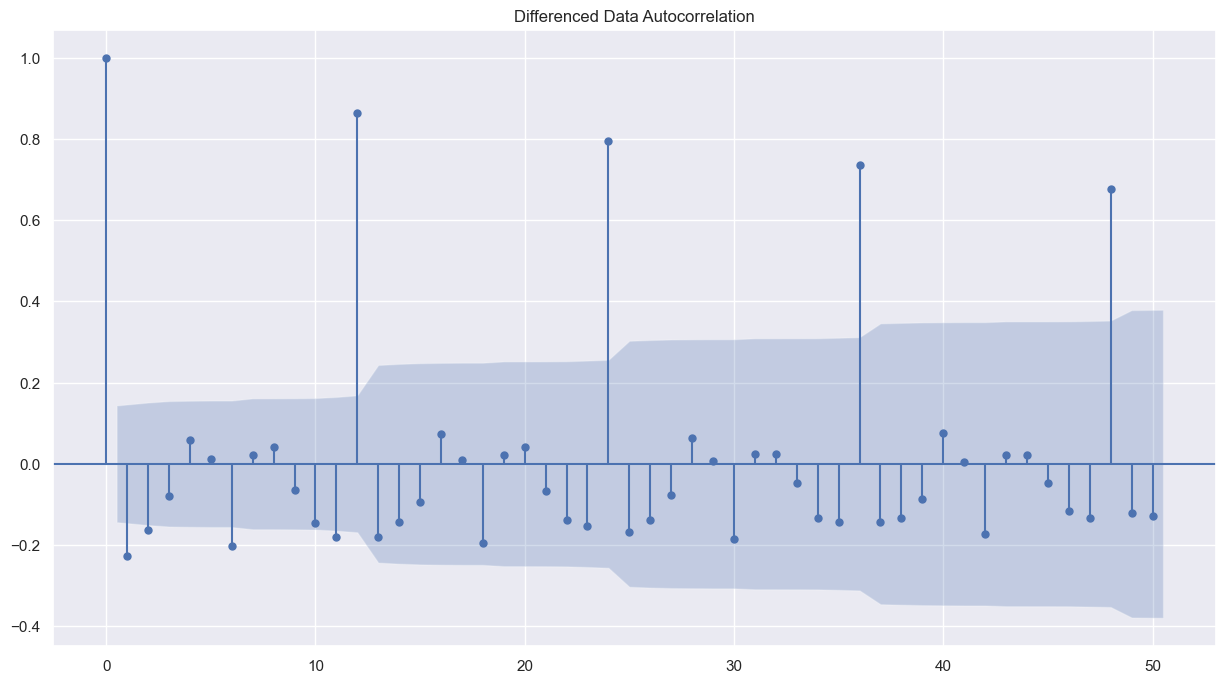

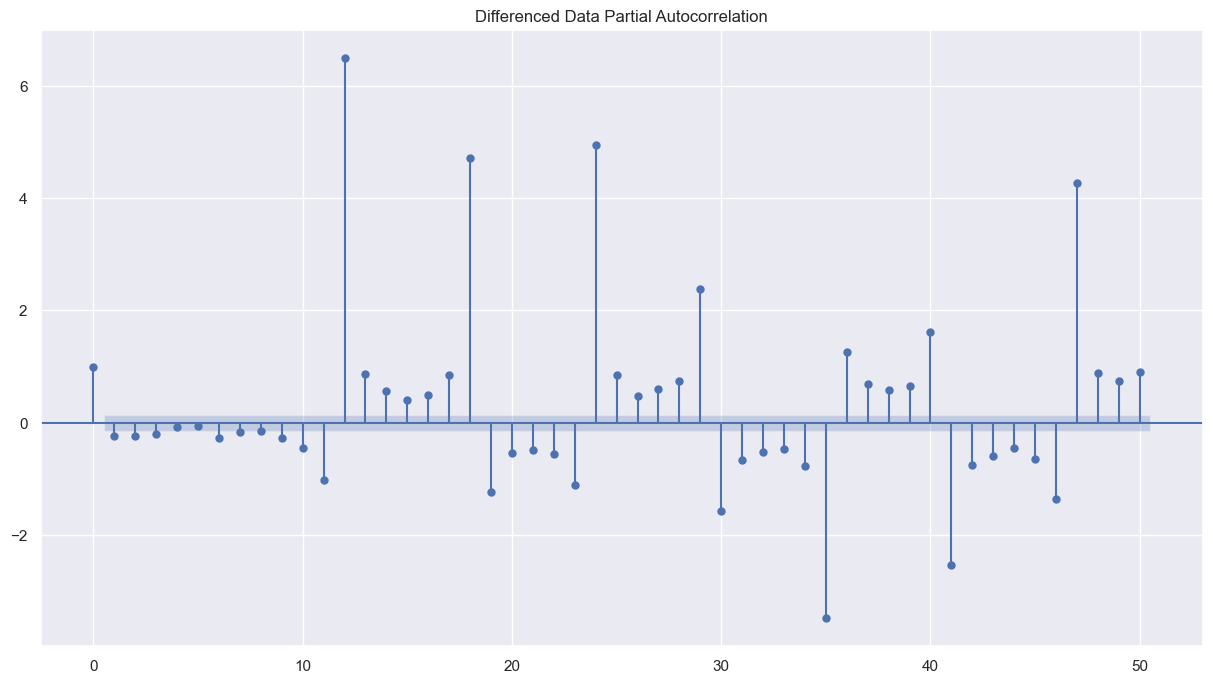

In [513]:
plot_acf(spdf["Sparkling"].diff().dropna(), lags=50, title="Differenced Data Autocorrelation")
plot_pacf(spdf["Sparkling"].diff().dropna(), lags=50, title="Differenced Data Partial Autocorrelation")

plt.show()

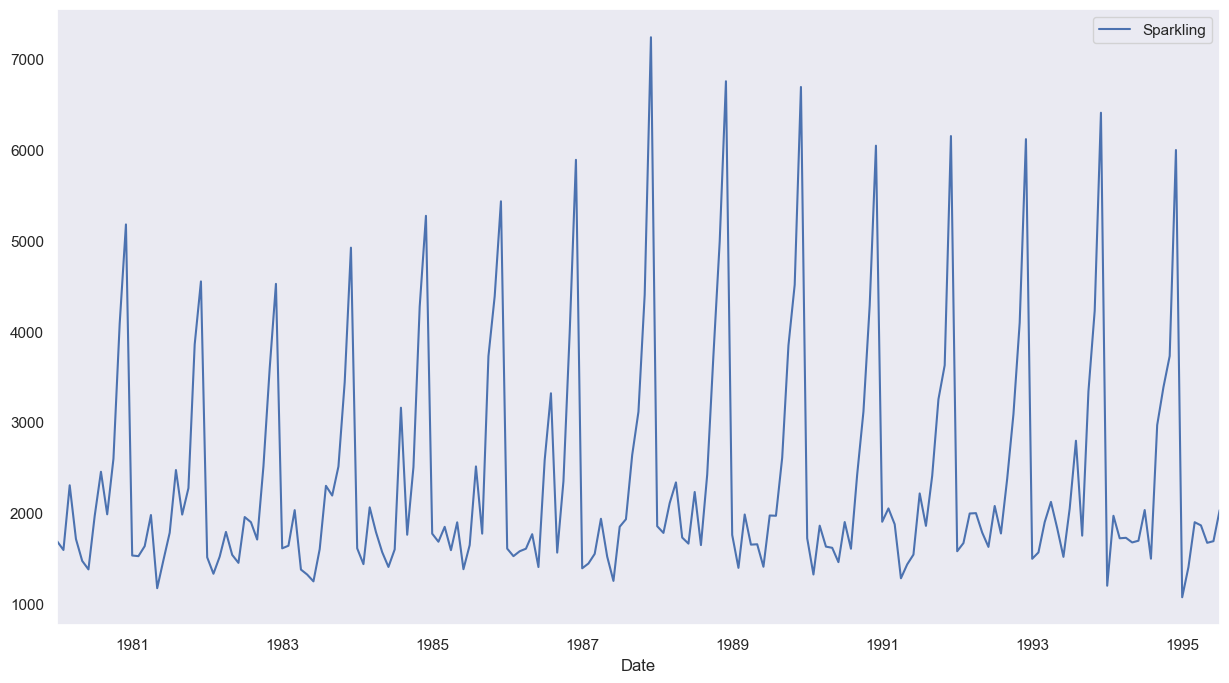

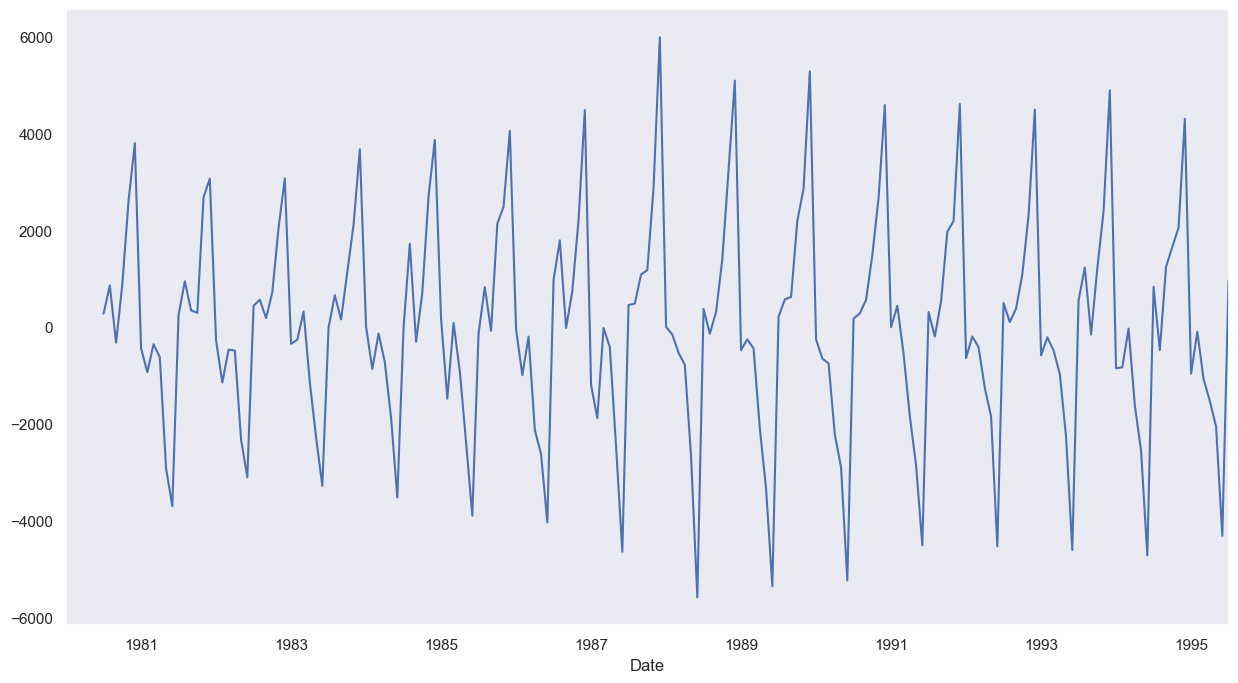

In [514]:
spdf.plot()
plt.grid()
plt.show()

(spdf["Sparkling"].diff(6)).plot()
plt.grid()
plt.show()

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

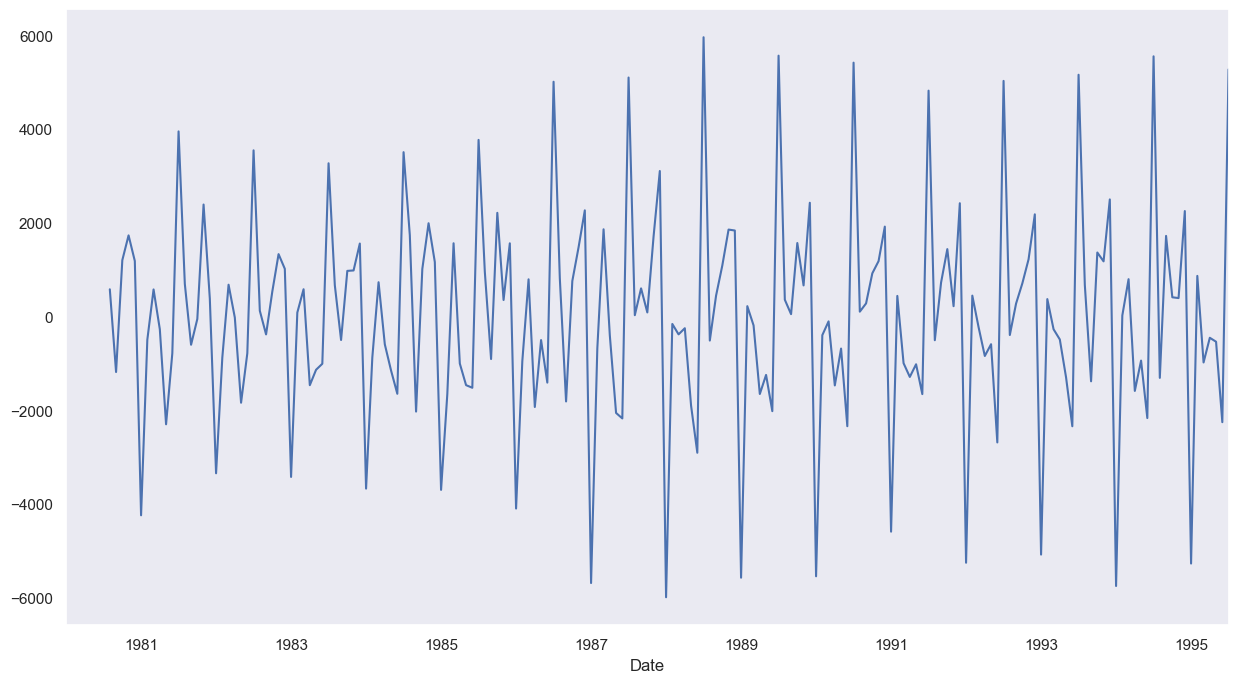

In [515]:
(spdf["Sparkling"].diff(6)).diff().plot()
plt.grid()
plt.show()

check the stationarity of the above series before fitting the SARIMA model.

## Stationarity Check

In [516]:
adfuller(train["Sparkling"])[1]

0.6697444263523349

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6. We will keep the p(0) and q(0) parameters same as the ARIMA model.

The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 2.
The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 2. 

## Manual SARIMA 6

In [517]:
manual_SARIMA_6 = SARIMAX(train["Sparkling"],
                         order=(3,1,2),
                         seasonal_order=(3,1,2,6),
                         enforce_stationarity=False,
                         enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
display(results_manual_SARIMA_6.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                         Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(3, 1, 2, 6)   Log Likelihood                -771.745
Date:                           Sun, 15 Aug 2021   AIC                           1565.490
Time:                                   18:40:17   BIC                           1594.578
Sample:                               01-31-1980   HQIC                          1577.274
                                    - 12-31-1990                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6107      0.335      1.825      0.068      -0.045       1.267
ar.L2         -0.1817      0.176     -1.035      0.301      -0.526       0.163
ar.L3          0.0260      0.218      0.119      0.905      -0.401       0.453
ma.L1         -2.2875      0.471     -4.856      0.000      -3.211      -1.364
ma.L2          1.1623      0.538      2.159      0.031       0.107       2.217
ar.S.L6       -1.3086      0.277     -4.725      0.000      -1.851      -0.766
ar.S.L12      -0.4371      0.401     -1.091      0.275      -1.223       0.348
ar.S.L18      -0.1499      0.213     -0.704      0.481      -0.567       0.267
ma.S.L6        0.7332      0.395      1.858      0.063      -0.040       1.507
ma.S.L12      -0.6079      0.298     -2.039      0.041      -1.192      -0.024
sigma2      4.582e+04    1.8e-05   2.55e+09      0.000    4.58e+04    4.58e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                35.42
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.31   Skew:                             0.56
Prob(H) (two-sided):                  0.42   Kurtosis:                         5.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.48e+26. Standard errors may be unstable.
"""

## Manual SARIMA 12

In [518]:
manual_SARIMA_12 = SARIMAX(train["Sparkling"],
                         order=(3,1,2),
                         seasonal_order=(3,1,2,12),
                         enforce_stationarity=False,
                         enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
display(results_manual_SARIMA_12.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(3, 1, 2, 12)   Log Likelihood                -598.630
Date:                            Sun, 15 Aug 2021   AIC                           1219.260
Time:                                    18:40:28   BIC                           1245.462
Sample:                                01-31-1980   HQIC                          1229.765
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7556      0.151     -5.013      0.000      -1.051      -0.460
ar.L2          0.1169      0.185      0.633      0.527      -0.245       0.479
ar.L3         -0.0520      0.143     -0.365      0.715      -0.332       0.228
ma.L1          0.0330      0.191      0.173      0.863      -0.341       0.407
ma.L2         -0.9670      0.156     -6.197      0.000      -1.273      -0.661
ar.S.L12      -0.7538      0.496     -1.520      0.128      -1.725       0.218
ar.S.L24      -0.6371      0.351     -1.818      0.069      -1.324       0.050
ar.S.L36      -0.2469      0.151     -1.641      0.101      -0.542       0.048
ma.S.L12       0.3719      0.491      0.758      0.448      -0.590       1.334
ma.S.L24       0.3466      0.365      0.949      0.343      -0.370       1.063
sigma2       1.79e+05   1.67e-06   1.07e+11      0.000    1.79e+05    1.79e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                13.16
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                             0.62
Prob(H) (two-sided):                  0.29   Kurtosis:                         4.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.94e+27. Standard errors may be unstable.
"""

## Prediction on the Test Set and Evaluation

In [519]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

display(predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head())


rmse_manualsarima6 = rmse(test["Sparkling"], predicted_manual_SARIMA_6.predicted_mean)
display("Test RMSE Manual SARIMA 6", rmse_manualsarima6)

temp_resultsDf = pd.DataFrame({"Test RMSE": [rmse_manualsarima6]}, index=["SARIMA(3,1,2)(3,1,2,6)"])

resultsDf = pd.concat([resultsDf, temp_resultsDf])


predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

display(predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head())


rmse_manualsarima12 = rmse(test["Sparkling"], predicted_manual_SARIMA_12.predicted_mean)
display("Test RMSE Manual SARIMA 12",rmse_manualsarima12)

temp_resultsDf = pd.DataFrame({"Test RMSE": [rmse_manualsarima12]}, index=["SARIMA(3,1,2)(3,1,2,12)"])

resultsDf = pd.concat([resultsDf, temp_resultsDf])

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  1398.425054  401.129046     612.226571    2184.623537
1991-02-28  1071.354225  408.565983     270.579614    1872.128836
1991-03-31  1677.473632  408.628746     876.576007    2478.371257
1991-04-30  1452.893987  410.019510     649.270514    2256.517459
1991-05-31  1145.412195  413.586091     334.798352    1956.026038

'Test RMSE Manual SARIMA 6'

933.0055860065444

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  1510.231997  425.098757     677.053744    2343.410250
1991-02-28  1431.674887  440.080823     569.132324    2294.217449
1991-03-31  1850.401507  440.152620     987.718225    2713.084789
1991-04-30  1781.971278  440.897834     917.827402    2646.115155
1991-05-31  1550.443568  440.888036     686.318897    2414.568239

'Test RMSE Manual SARIMA 12'

329.5350922346566

# Build table with all the above models with RMSE scores

In [520]:
display(resultsDf.sort_values(by=["Test RMSE"],ascending=True))

Test RMSE
SARIMA(3,1,2)(3,1,2,12)                               329.535092
Alpha=0.7,Beta=0.3,Gamma=0.3,TripleExponentialS...    343.618889
SARIMA(1,1,2)(2,0,2,6)                                459.643847
Alpha=0.146,Beta=0.053,Gamma=0.393,TripleExpone...    469.656044
SARIMA(1,1,2)(2,0,2,12)                               546.449398
2_point_trailing_Moving_Average                       813.400684
SARIMA(3,1,2)(3,1,2,6)                                933.005586
4_point_trailing_Moving_Average                      1156.589694
SimpleAverageModel                                   1275.081804
6_point_trailing_Moving_Average                      1283.927428
Alpha=0.03,SimpleExponentialSmoothing                1316.135411
9_point_trailing_Moving_Average                      1346.278315
ARIMA(2,1,2)                                         1374.311711
Manual ARIMA(3,1,2)                                  1378.094442
RegressionOnTime                                     1389.135175
Alpha=0.4,SimpleExponentialSmoothing                 1935.507132
NaiveModel                                           3864.279352
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704

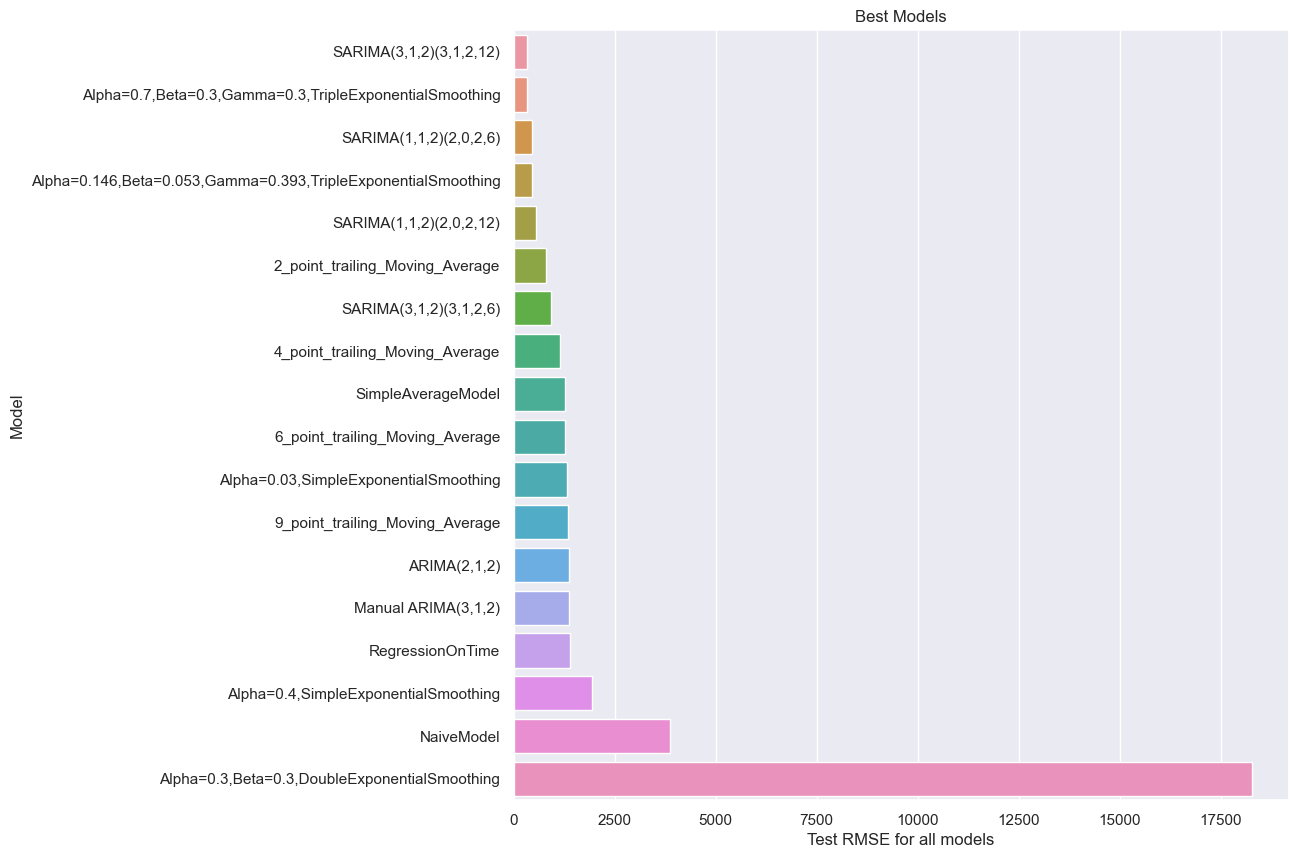

In [521]:
res_df = pd.DataFrame({'columns': resultsDf.index, 'Test RMSE': resultsDf["Test RMSE"]})
sorted_resDf_values = res_df.sort_values('Test RMSE', ascending=True)
plt.figure(figsize=(10,10))
sns.barplot(x='Test RMSE', y='columns', data=sorted_resDf_values)
plt.xlabel('Test RMSE for all models')
plt.ylabel('Model')
plt.title('Best Models')
plt.show()

## Build most optimum model on the Full Data

In [522]:
full_data_model = SARIMAX(spdf["Sparkling"], order=(3,1,2), seasonal_order=(3,1,2,12),
                         enforce_stationarity=False,
                         enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
display(results_full_data_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(3, 1, 2)x(3, 1, 2, 12)   Log Likelihood               -1000.243
Date:                            Sun, 15 Aug 2021   AIC                           2022.487
Time:                                    18:40:52   BIC                           2054.445
Sample:                                01-31-1980   HQIC                          2035.473
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8611      0.090     -9.545      0.000      -1.038      -0.684
ar.L2          0.0118      0.129      0.091      0.927      -0.242       0.265
ar.L3         -0.0767      0.102     -0.754      0.451      -0.276       0.123
ma.L1          0.0322      0.120      0.269      0.788      -0.203       0.267
ma.L2         -0.9678      0.098     -9.838      0.000      -1.161      -0.775
ar.S.L12      -0.6102      0.392     -1.556      0.120      -1.379       0.159
ar.S.L24      -0.4984      0.231     -2.162      0.031      -0.950      -0.047
ar.S.L36      -0.2472      0.109     -2.263      0.024      -0.461      -0.033
ma.S.L12       0.1230      0.395      0.311      0.756      -0.652       0.898
ma.S.L24       0.2492      0.266      0.937      0.349      -0.272       0.770
sigma2      1.562e+05   1.31e-06   1.19e+11      0.000    1.56e+05    1.56e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                26.96
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                             0.59
Prob(H) (two-sided):                  0.05   Kurtosis:                         4.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.49e+28. Standard errors may be unstable.
"""

# Use optimal model with lowest RMSE to predict 12 months into future with a plot and confidence intervals

In [523]:
predicted_manual_SARIMA_12_full_data = results_full_data_model.get_forecast(steps=12)

display(predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).head())

rmse_full_data = rmse(spdf["Sparkling"], results_full_data_model.fittedvalues)
display(rmse_full_data)

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1868.826455  396.504223    1091.692458    2645.960452
1995-09-30  2511.292655  401.856913    1723.667578    3298.917731
1995-10-31  3272.713048  402.702600    2483.430456    4061.995640
1995-11-30  3874.518132  403.117621    3084.422113    4664.614151
1995-12-31  6099.043204  403.137241    5308.908729    6889.177678

578.956975049657

In [524]:
pred_full_manual_SARIMA_data = predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start="1995-08-31", end="1996-07-31", freq="M"))

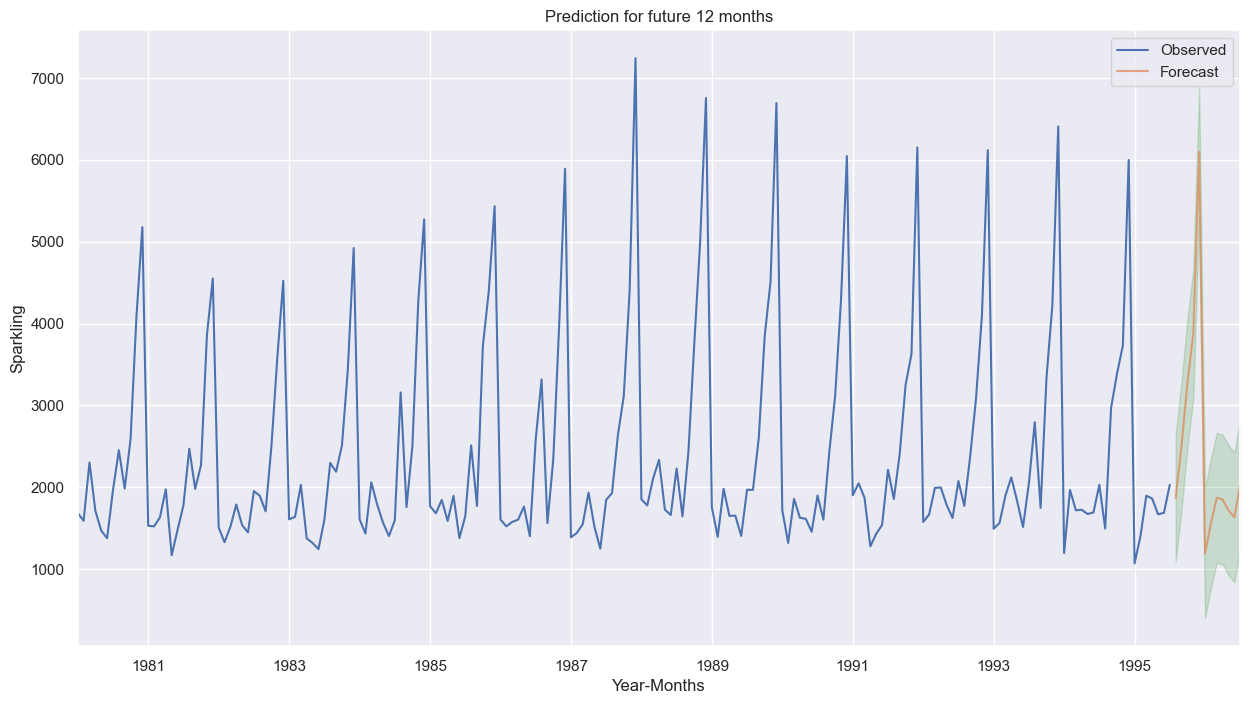

In [525]:
axis = spdf["Sparkling"].plot(label="Observed")

pred_full_manual_SARIMA_data["mean"].plot(ax=axis, label="Forecast", alpha=0.7)

axis.fill_between(pred_full_manual_SARIMA_data.index,
                 pred_full_manual_SARIMA_data["mean_ci_lower"],
                 pred_full_manual_SARIMA_data["mean_ci_upper"],
                 color="green",
                 alpha=0.15)

axis.set_xlabel("Year-Months")
axis.set_ylabel("Sparkling")
plt.title("Prediction for future 12 months")
plt.legend(loc="best")
plt.show()
